In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter), will list all files under the input directory

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 


import datetime


from sklearn.model_selection import train_test_split 


from sklearn.metrics import classification_report , ConfusionMatrixDisplay

In [3]:
train =pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/train.csv')
train2 =pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/train.csv')

test_final=pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/test.csv')


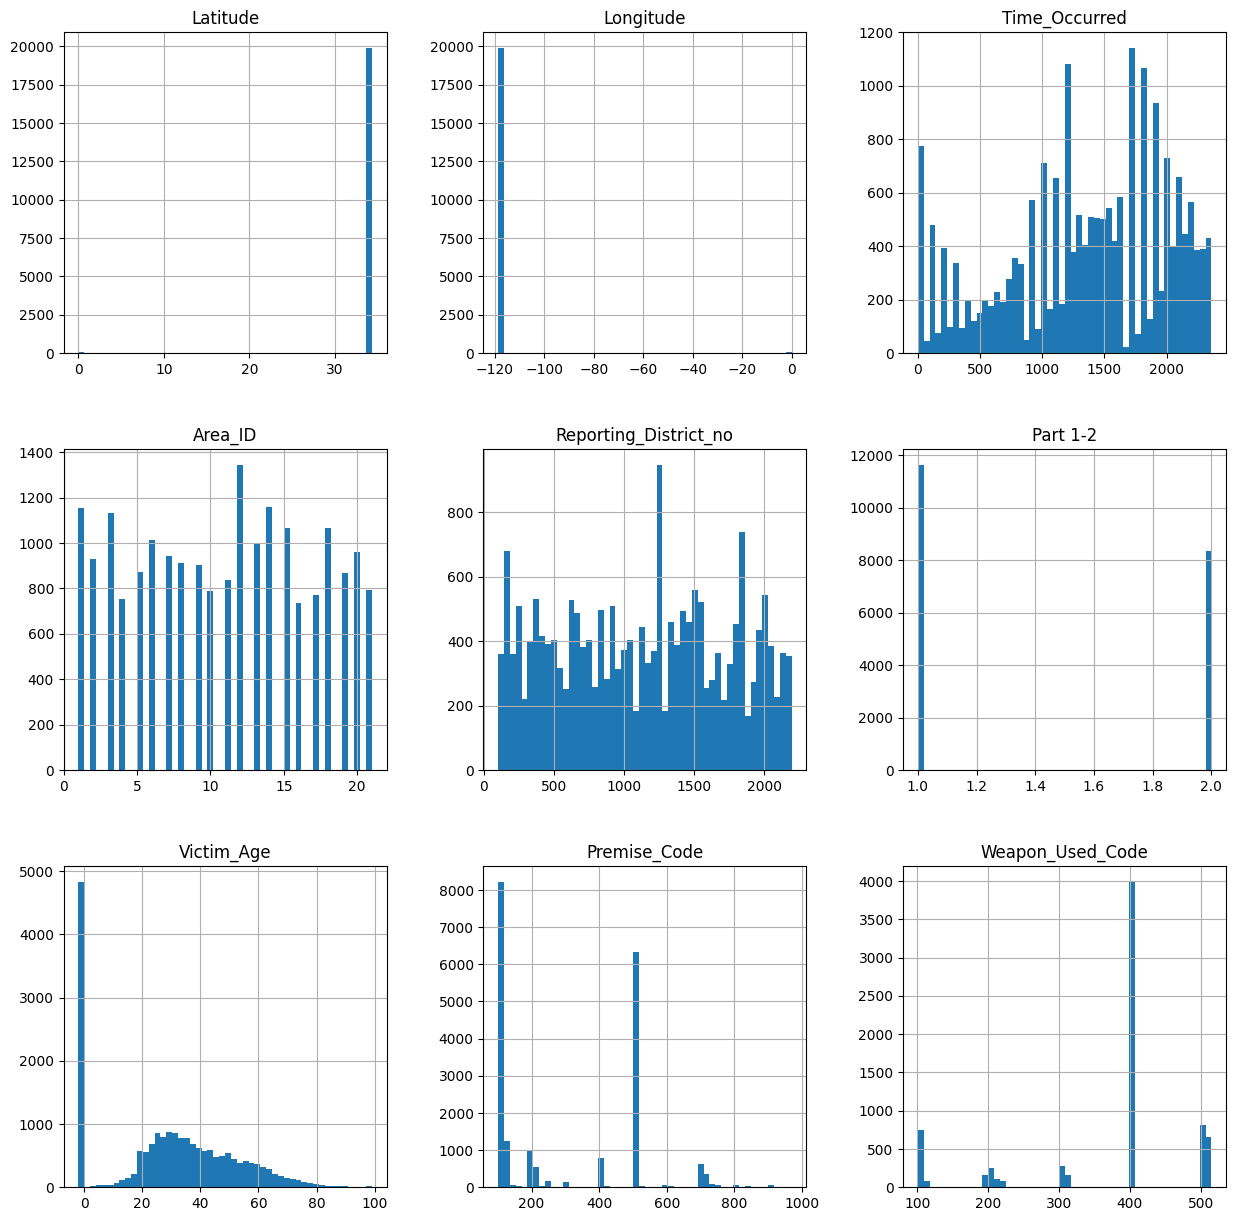

In [4]:
train.hist(bins=50,figsize=(15,15))
plt.show()

# **Categorical Columns **

# Location

In [5]:
print(train['Location'].unique())


print('--------------------------------')

print('Number of unqiue location : '  , len(train['Location'].unique()))


print('--------------------------------')


train.loc[: , 'Location']=train['Location'].apply( lambda x : ' '.join(x.split()))

print(train['Location'].unique())



print('Number of unqiue location : '  , len(train['Location'].unique()))

# print('Removed space' , len(train['Location'].unique()) )


['4500    CARPENTER                    AV'
 '45TH                         ST'
 '600 E  MARTIN LUTHER KING JR        BL' ...
 '15800    STRATHERN                    ST'
 '5100 W  ADAMS                        BL'
 'DALTON                       AV']
--------------------------------
Number of unqiue location :  12399
--------------------------------
['4500 CARPENTER AV' '45TH ST' '600 E MARTIN LUTHER KING JR BL' ...
 '15800 STRATHERN ST' '5100 W ADAMS BL' 'DALTON AV']
Number of unqiue location :  12396


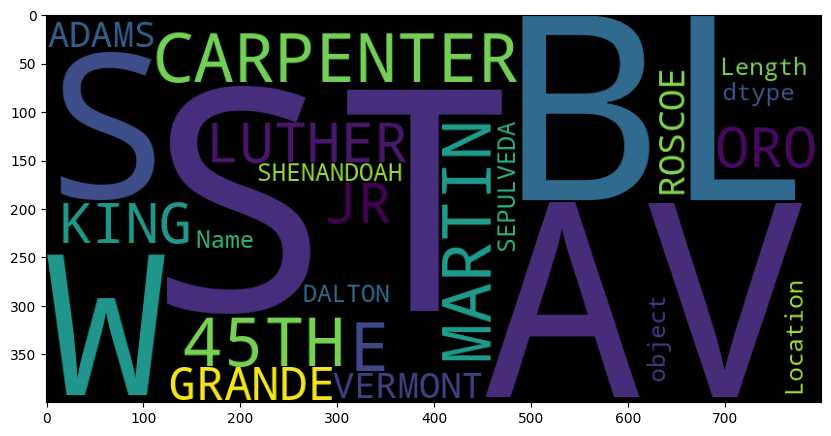

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


cloud = WordCloud(width=800, height=400, background_color='black').generate(str(train['Location']))
plt.figure(figsize=(10, 6))
plt.imshow(cloud)
plt.show()


<Axes: xlabel='Location'>

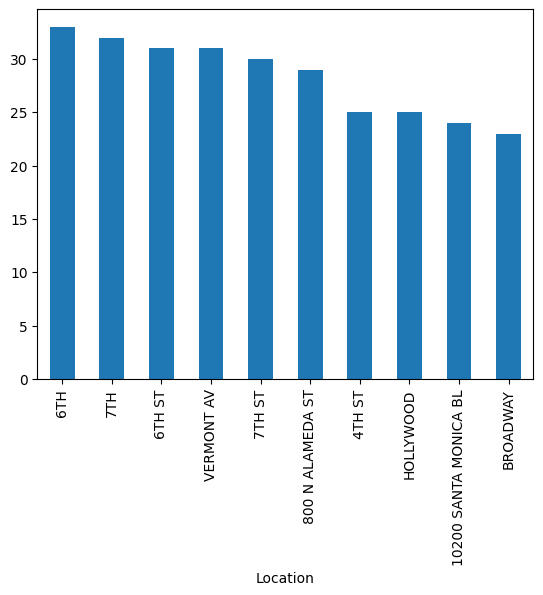

In [7]:
train['Location'].value_counts().head(10).plot(kind='bar')

# Cross_Street

In [8]:
train['Cross_Street']

0                                    NaN
1        ALAMEDA                      ST
2                                    NaN
3                                    NaN
4                                    NaN
                      ...               
19995                                NaN
19996                                NaN
19997                                NaN
19998                                NaN
19999    VERNON                       AV
Name: Cross_Street, Length: 20000, dtype: object

In [9]:
# print('unqiue values before replacing the null values')
# print(train['Cross_Street'].unique())

# print("Number of unique values : " , len(train['Cross_Street'].unique()) )

# print('----------------------------------------------------')
train.loc[:,'Cross_Street']=train['Cross_Street'].fillna('')


print(' unqiue values after replacing the null values')


print(train['Cross_Street'].unique())

# train.loc[: , 'Cross_Street']=train['Cross_Street'].apply( lambda x : ' '.join(x.split()))

train.loc[: , 'Cross_Street']=train['Cross_Street'].apply( lambda x : ' '.join(x.split()))

print("Number of unique values : " , len(train['Cross_Street'].unique()) )


print('----------------------------------------------------')


print("Number of null values values the cross_street column originally has " ,16552)

 unqiue values after replacing the null values
['' 'ALAMEDA                      ST' 'LASSEN                       ST'
 ... 'VICTORIA' '39TH                         ST' 'HAVELOCK']
Number of unique values :  1496
----------------------------------------------------
Number of null values values the cross_street column originally has  16552


In [10]:
train.isnull().sum()

Location                     0
Cross_Street                 0
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64

# Area_ID


unique values of area id are :
[15. 13. 19. 12. 11.  4. 14.  9. 17.  7.  6.  5. 21.  1. 10. 20. 16.  8.
 18.  3.  2.]
-------------------------------------------
Number of unique values are  21
Number of null values are  0
-------------------------------------------
Area_ID
12.0    1345
14.0    1157
1.0     1156
3.0     1130
18.0    1067
15.0    1065
6.0     1014
13.0     999
20.0     960
7.0      943
2.0      931
8.0      910
9.0      902
5.0      872
19.0     870
11.0     839
21.0     792
10.0     790
17.0     769
4.0      755
16.0     734
Name: count, dtype: int64
-------------------------------------------


/tmp/ipykernel_18/2200294362.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['15.0' '13.0' '13.0' ... '8.0' '5.0' '3.0']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  train.loc[:,'Area_ID']=train['Area_ID'].astype(str)


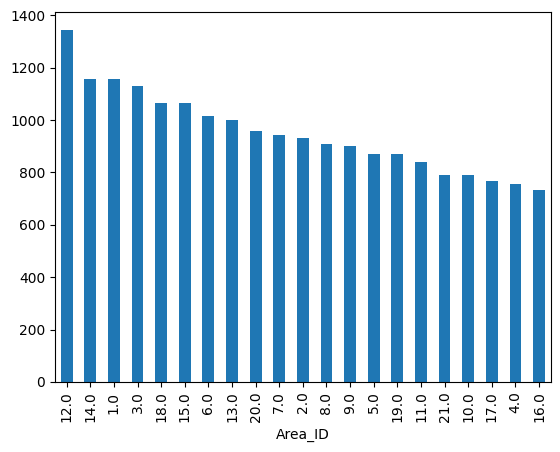

<Figure size 1500x1000 with 0 Axes>

In [11]:
print('unique values of area id are :')
print(train['Area_ID'].unique())

print('-------------------------------------------')

print('Number of unique values are ' , len(train['Area_ID'].unique()))


print('Number of null values are ' , train['Area_ID'].isnull().sum())


print('-------------------------------------------')

train.loc[:,'Area_ID']=train['Area_ID'].astype(str)
train.loc[:,'Area_ID']=train['Area_ID'].astype('category')

print(train['Area_ID'].value_counts())


print('-------------------------------------------')


Area_ID_value_counts=train['Area_ID'].value_counts()

Area_ID_value_counts.plot(kind='bar')
plt.figure(figsize=(15, 10))

plt.show()

# Area_Name

Area Name == Area id columns

In [12]:
print('unique areas are')
print(train['Area_Name'].unique())

print('-------------------------------------------')


print('Number of unique values are ' , len(train['Area_Name'].unique()))

print('-------------------------------------------')

print('Number of null values are ' , train['Area_Name'].isnull().sum())
print('-------------------------------------------')

print(train['Area_Name'].value_counts())


unique areas are
['N Hollywood' 'Newton' 'Mission' '77th Street' 'Northeast' 'Hollenbeck'
 'Pacific' 'Van Nuys' 'Devonshire' 'Wilshire' 'Hollywood' 'Harbor'
 'Topanga' 'Central' 'West Valley' 'Olympic' 'Foothill' 'West LA'
 'Southeast' 'Southwest' 'Rampart']
-------------------------------------------
Number of unique values are  21
-------------------------------------------
Number of null values are  0
-------------------------------------------
Area_Name
77th Street    1345
Pacific        1157
Central        1156
Southwest      1130
Southeast      1067
N Hollywood    1065
Hollywood      1014
Newton          999
Olympic         960
Wilshire        943
Rampart         931
West LA         910
Van Nuys        902
Harbor          872
Mission         870
Northeast       839
Topanga         792
West Valley     790
Devonshire      769
Hollenbeck      755
Foothill        734
Name: count, dtype: int64


# Reporting_District_no

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           20000 non-null  object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  object 
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

unique areas are
['1563.0' '1367.0' '1343.0' ... '1778.0' '1199.0' '812.0']
-------------------------------------------
Number of unique values are  1120
-------------------------------------------
Number of null values are  0
-------------------------------------------
Reporting_District_no
645.0     99
162.0     85
1494.0    74
1822.0    72
182.0     72
          ..
452.0      1
871.0      1
1476.0     1
848.0      1
812.0      1
Name: count, Length: 1120, dtype: int64
-------------------------------------------


/tmp/ipykernel_18/4222087248.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1563.0' '1367.0' '1343.0' ... '849.0' '558.0' '397.0']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  train.loc[:,'Reporting_District_no']=train['Reporting_District_no'].astype(str)


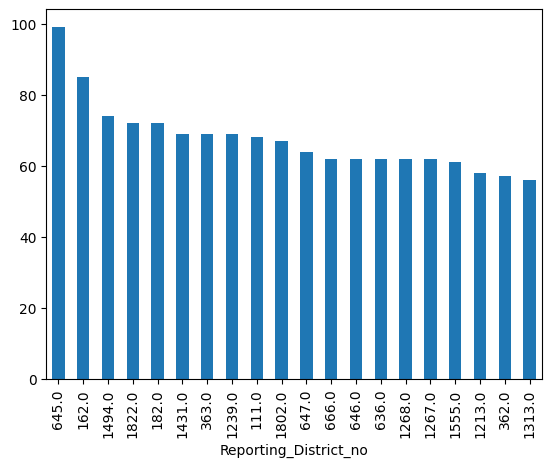

<Figure size 1000x600 with 0 Axes>

In [14]:
train.loc[:,'Reporting_District_no']=train['Reporting_District_no'].astype(str)
train.loc[:,'Reporting_District_no']=train['Reporting_District_no'].astype('category')

                                      
print('unique areas are')
print(train['Reporting_District_no'].unique())

print('-------------------------------------------')


print('Number of unique values are ' , len(train['Reporting_District_no'].unique()))

print('-------------------------------------------')

print('Number of null values are ' , train['Reporting_District_no'].isnull().sum())
print('-------------------------------------------')

print(train['Reporting_District_no'].value_counts())


Reporting_District_no_value_counts=train['Reporting_District_no'].value_counts()
print('-------------------------------------------')



Reporting_District_no_value_counts.head(20).plot(kind='bar')
plt.figure(figsize=(10, 6))
plt.show()


In [15]:
Top_1_Reporting_District_no=['645.0','162.0','1494.0','1822.0','182.0','1431.0','363.0','1239.0','111.0','1802.0']

Top_2_Reporting_District_no=['647.0','647.0','666.0','646.0','636.0','1268.0','1267.0','1555.0','1213.0','362.0','1313.0','1241.0']

Top_3_Reporting_District_no=['361.0','1842.0','152.0','1801.0','923.0','702.0','1256.0','153.0','119.0','1764.0']

Top_4_Reporting_District_no=['765.0','1259.0','395.0','1823.0','529.0','1985.0','1844.0','1249.0','701.0','914.0']


def Reporting_District_no_imputation(x):
    if x in Top_1_Reporting_District_no:
        return 'Top1'
    elif x in Top_2_Reporting_District_no:
        return 'Top2'
    elif x in Top_3_Reporting_District_no:
        return 'Top3'
    elif x in Top_1_Reporting_District_no:
        return 'Top4'
    else:
        return 'Rest_Reporting_District_no'

In [16]:
train.loc[:,'Reporting_District_no']=train['Reporting_District_no'].apply(lambda x: Reporting_District_no_imputation(x))

In [17]:
train['Reporting_District_no'].value_counts()

Reporting_District_no
Rest_Reporting_District_no    18063
Top1                            744
Top2                            661
Top3                            532
Name: count, dtype: int64

# Part 1-2

Unique values in Part 1-2 columns are: ['1.0' '2.0']
----------------------------------------
 value counts in Part 1-2 columns are: Part 1-2
1.0    11637
2.0     8363
Name: count, dtype: int64
----------------------------------------


/tmp/ipykernel_18/2574664916.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1.0' '1.0' '2.0' ... '1.0' '2.0' '1.0']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  train.loc[:,'Part 1-2']=train['Part 1-2'].astype(str)


<Axes: xlabel='Part 1-2'>

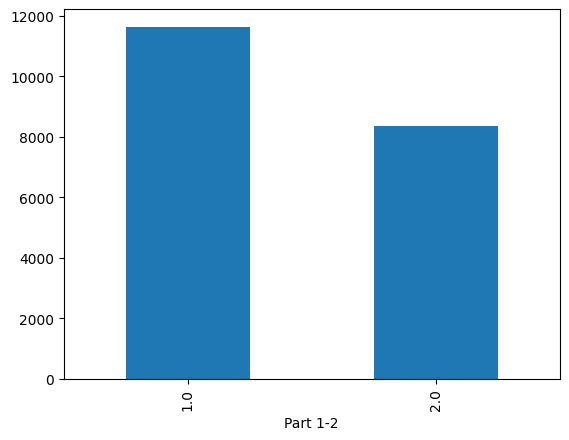

In [18]:
train.loc[:,'Part 1-2']=train['Part 1-2'].astype(str)

print("Unique values in Part 1-2 columns are:",train['Part 1-2'].unique())

print('----------------------------------------')

print(" value counts in Part 1-2 columns are:",train['Part 1-2'].value_counts())


print('----------------------------------------')

value_counts_part_1_2=train['Part 1-2'].value_counts()

value_counts_part_1_2.plot(kind='bar')

# Modus_Operandi

In [19]:
train['Modus_Operandi']

0                                           0385
1        0906 0352 0371 0446 1822 0344 0416 0417
2                                      0329 1202
3                                      0329 1300
4                  0416 0945 1822 0400 0417 0344
                          ...                   
19995                        0416 0446 2004 0913
19996                   1822 0209 0344 1414 1420
19997                             0344 1822 1420
19998              1202 2038 0913 0602 1242 0553
19999                                        NaN
Name: Modus_Operandi, Length: 20000, dtype: object

In [20]:
print("Unique values in Modus_Operandi are ",train['Modus_Operandi'].unique())
print(" ")
print("Each  row value is combination of diff-diff activities so thats the reason we have  10489 uniques values.")

print('')

print('----------------------------------------------------------')

print(train['Modus_Operandi'].value_counts())

print('')

Modus_Operandi_value_counts=train['Modus_Operandi'].value_counts()

print('')



print('----------------------------------------------------------')


train['Modus_Operandi'] = train['Modus_Operandi'].fillna('')

print("Number of null values after fill with empty string are ",train['Modus_Operandi'].isnull().sum())


Unique values in Modus_Operandi are  ['0385' '0906 0352 0371 0446 1822 0344 0416 0417' '0329 1202' ...
 '0416 0446 2004 0913' '1822 0209 0344 1414 1420'
 '1202 2038 0913 0602 1242 0553']
 
Each  row value is combination of diff-diff activities so thats the reason we have  10489 uniques values.

----------------------------------------------------------
Modus_Operandi
0344                                       826
0329                                       583
1501                                       187
0329 1300                                  135
0325                                       127
                                          ... 
1609 0329 1307 0344                          1
0344 2050 0910 2034                          1
0400 2000 0913                               1
1822 0342 0910 2049 2051 0305 0444 0344      1
1202 2038 0913 0602 1242 0553                1
Name: count, Length: 10489, dtype: int64


----------------------------------------------------------
Number of n

<Axes: xlabel='Modus_Operandi'>

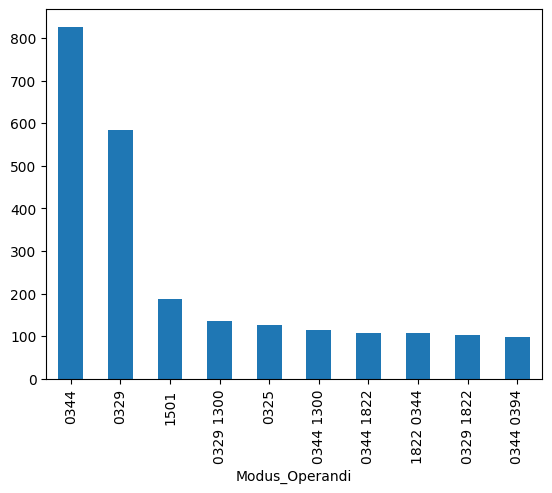

In [21]:
Modus_Operandi_value_counts.head(10).plot(kind='bar')

In [22]:
# def number_of_activities(s):
#     activities=[]
#     s=str(s)
#     a=s.split(' ')
#     for i in a:
#         if a not in activities:
#             activities.append(a)
#     return activities

def number_of_activities(s):
    if s=='':  # Handle NaN values
        return 0
    activities_list=s.split()
    activity_count = list(set(activities_list))
#     activities = set()  # Using a set to avoid duplicates efficiently
#     for activity in s.split(' '):
#         activities.add(str(activity))
#     activities=' '.join(activities)    
    return len(activity_count)
train['activity_count']=train['Modus_Operandi'].apply(number_of_activities)
# df.drop('Modus_Operandi',axis=1)
# df['Modus_Operandi']=df['unique_activities']
# df.drop('unique_activities',axis=1,inplace=True)

In [23]:
train[['Modus_Operandi','activity_count']]

,Modus_Operandi,activity_count
0,0385,1
1,0906 0352 0371 0446 1822 0344 0416 0417,8
2,0329 1202,2
3,0329 1300,2
4,0416 0945 1822 0400 0417 0344,6
...,...,...
19995,0416 0446 2004 0913,4
19996,1822 0209 0344 1414 1420,5
19997,0344 1822 1420,3
19998,1202 2038 0913 0602 1242 0553,6


In [24]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MultiLabelBinarizer

class MultiLabelBinarizerWrapper(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mlb = MultiLabelBinarizer()

    def fit(self, X, y=None):
        self.mlb.fit(X)
        return self

    def transform(self, X):
        return self.mlb.transform(X)

# Status and Status_Description 

Status and Status_Description convey same information 

Number of unique values in Status are  ['IC' 'AO' 'AA' 'JA' 'JO']
 values in Status are  Status
IC    15236
AO     2597
AA     2054
JA       70
JO       43
Name: count, dtype: int64
Null values in status are 0

--------------------------------------------------------------

Number of unique values in Status_Description are  ['Invest Cont' 'Adult Other' 'Adult Arrest' 'Juv Arrest' 'Juv Other']
 values in Status_Description are  Status_Description
Invest Cont     15236
Adult Other      2597
Adult Arrest     2054
Juv Arrest         70
Juv Other          43
Name: count, dtype: int64
Null values in Status_Description are 0

--------------------------------------------------------------



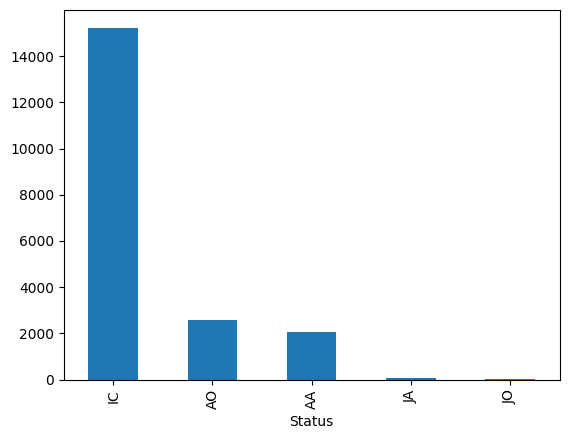

<Axes: xlabel='Status_Description'>

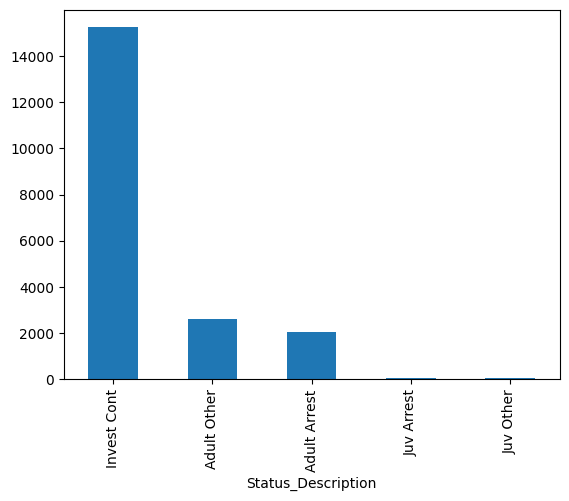

In [25]:
print("Number of unique values in Status are ",train['Status'].unique())

print(" values in Status are ",train['Status'].value_counts())

print('Null values in status are' ,train['Status'].isnull().sum() )

Status_value_counts=train['Status'].value_counts()


print('')
print('--------------------------------------------------------------')
print('')

print("Number of unique values in Status_Description are ",train['Status_Description'].unique())

print(" values in Status_Description are ",train['Status_Description'].value_counts())

print('Null values in Status_Description are' ,train['Status_Description'].isnull().sum() )


Status_Description_value_counts=train['Status_Description'].value_counts()



print('')
print('--------------------------------------------------------------')
print('')

Status_value_counts.plot(kind='bar')
plt.show()

Status_Description_value_counts.plot(kind='bar')


# Weapon_Used_Code  and Weapon_Description

Both columns gives same information


In [26]:
print('Number of null values are')
train[['Weapon_Description','Weapon_Used_Code']].isnull().sum()

Number of null values are


Weapon_Description    12665
Weapon_Used_Code      12665
dtype: int64

In [27]:
print('Number of unqiue values are')
train['Weapon_Description'].value_counts()

Number of unqiue values are


Weapon_Description
STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    3990
UNKNOWN WEAPON/OTHER WEAPON                        789
VERBAL THREAT                                      546
HAND GUN                                           388
KNIFE WITH BLADE 6INCHES OR LESS                   160
SEMI-AUTOMATIC PISTOL                              154
UNKNOWN FIREARM                                    131
OTHER KNIFE                                        125
VEHICLE                                             84
MACE/PEPPER SPRAY                                   80
ROCK/THROWN OBJECT                                  63
BOTTLE                                              55
PIPE/METAL PIPE                                     52
CLUB/BAT                                            51
STICK                                               49
KITCHEN KNIFE                                       45
KNIFE WITH BLADE OVER 6 INCHES IN LENGTH            43
AIR PISTOL/REVOLVER/RIFLE/BB GUN              

In [28]:
train.loc[train['Weapon_Description'] == 'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)' , 'Weapon_Description'] = 'Physical Force'

# EXPLOXIVE DEVICE                                     3
# RAZOR                                                1
# LIQUOR/DRUGS                                         1
# DOG/ANIMAL (SIC ANIMAL ON)                           1
# SWORD   


# NA                                                3153
# STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    1003
# sharp_heavy_object                                 431
# other_weapon                                       170
# Gun                                                164
# fire                                                44
# VEHICLE                                             28
# Physical Force                                       4
# EXPLOXIVE DEVICE                                     3

def gun(s):
    
    if pd.isna(s):
        return 'NA'
    t=s.replace('/',' ')
    listt=t.split(' ' or '/')
    
    gun_keywords=['gun','pistol','revolver','rifle','shotgun','AK47','explosive','exploxive']
    
    sharp_heavy_object=['blade','razor','stone','sword','knife','metal','screwdriver','cleaver', 'glass','machete' ,'iron' , 'cutting','axe' ,'instrument','hammer','weapon','object','bottle','weapons','brass','scissors']
    
    other_weapon = ['bomb','threat', 'demand', 'poison', 'ice', 'scalding', 'board','block' ,'brick', 'stick', 'bat', 'spray','drugs','dog']
    
    physical_presence=['physical','presence','strong-arm']
    
    fire=['firearm' , 'fire' ]

    for i in listt:
        if i.lower() in gun_keywords:
            return 'Gun'
        elif i.lower() in sharp_heavy_object:
            return 'sharp_heavy_object'
        
        elif i.lower() in fire:
            return 'fire'
        elif i.lower() in other_weapon:
            return 'other_weapon'
        elif i.lower() in physical_presence:
            return 'Physical Force'
        elif i.lower() == 'strong-arm':
            return 'Physical Force'
            
        
    return s
    



train.loc[:,'Weapon_Description']=train['Weapon_Description'].apply(lambda x: gun(x))

In [29]:
print('Number of unqiue values are')
train['Weapon_Description'].value_counts()

Number of unqiue values are


Weapon_Description
NA                    12665
Physical Force         4008
sharp_heavy_object     1613
other_weapon            772
Gun                     687
fire                    171
VEHICLE                  84
Name: count, dtype: int64

In [30]:
distribution = train['Weapon_Description'][train['Weapon_Description'] != 'NA'].value_counts(normalize=True)

missing = train[train['Weapon_Description']=='NA']['Weapon_Description'].count()

imputed_values = np.random.choice(distribution.index, size=missing, p=distribution.values)


train.loc[train['Weapon_Description']=='NA', 'Weapon_Description'] = imputed_values

In [31]:
train['Weapon_Description'].value_counts()

Weapon_Description
Physical Force        10910
sharp_heavy_object     4422
other_weapon           2129
Gun                    1835
fire                    468
VEHICLE                 236
Name: count, dtype: int64

In [32]:
train.isnull().sum()

Location                     0
Cross_Street                 0
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi               0
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description           0
Status                       0
Status_Description           0
Crime_Category               0
activity_count               0
dtype: int64

# Premise_Description , Premise_Code


In [33]:
print("Unique values are:")
print('')
print(train['Premise_Code'].unique())

print('')
print('')

print(train['Premise_Description'].unique())

Unique values are:

[101. 216. 501. 401. 502. 202. 104. 108. 121. 102. 203. 122. 707. 503.
 506. 509. 710. 103. 602. 519. 406. 751. 210. 123. 801. 601. 243. 242.
 504. 124. 505. 119. 252. 109. 704. 152. 120. 301. 404. 720. 405. 402.
 213. 514. 248. 702. 708. 834. 212. 416. 954. 158. 403. 701. 721. 725.
 605. 726. 912. 729. 139. 145. 208. 719. 201. 141. 107. 222. 144. 116.
 507. 221. 254. 757. 217. 110. 408. 146. 510. 750. 229. 727. 249. 236.
 738. 516. 735. 716. 908. 232. 517. 722. 515. 874. 518. 118. 127. 151.
 932. 411. 415. 910. 414. 220. 255. 407. 239. 156. 233. 717. 900. 956.
 949. 218. 732. 936. 244. 835. 715. 410. 231. 728. 417. 207. 247. 206.
 913. 733. 409. 811. 235. 724. 902. 712. 941. 117. 412. 705. 512. 907.
 142. 903. 953. 511. 753. 736. 205. 897. 875. 138. 709. 128. 209. 230.
 916. 723. 140. 157. 969. 135. 302. 958. 251. 921. 730. 809. 740. 957.
 917. 905. 214. 148. 706. 909. 896. 418. 744. 911. 802. 154. 413. 895.
 966. 219. 234. 948. 922. 603. 238. 906. 951. 935. 950. 1

In [34]:
train.loc[:,'Premise_Code']=train.loc[:,'Premise_Code'].astype(str)

print("value counts are:")
print('')
print(train['Premise_Code'].value_counts())


value counts are:

Premise_Code
101.0    5033
501.0    3379
502.0    2491
108.0    1437
102.0     978
         ... 
214.0       1
909.0       1
896.0       1
744.0       1
250.0       1
Name: count, Length: 217, dtype: int64


/tmp/ipykernel_18/3041038907.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['101.0' '216.0' '501.0' ... '102.0' '501.0' '101.0']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  train.loc[:,'Premise_Code']=train.loc[:,'Premise_Code'].astype(str)


In [35]:
top_10_Premise_Code=['101.0' , '501.0','502.0','108.0','108.0','102.0','203.0','122.0','707.0']

def top_10_Premise_Code_function(x):
    if (x in top_10_Premise_Code):
        return x
    else:
        return '000'
    
train.loc[:,'Premise_Code']=train['Premise_Code'].apply(lambda x : top_10_Premise_Code_function(x))

In [36]:
(train['Premise_Code'].value_counts())[:10]

Premise_Code
101.0    5033
000      4650
501.0    3379
502.0    2491
108.0    1437
102.0     978
203.0     916
122.0     679
707.0     437
Name: count, dtype: int64

In [37]:
len(train['Premise_Code'].unique())

9

# Victim_Sex 

In [38]:
print("Unique values of victim sex are",train['Victim_Sex'].unique())


print('')
print('')

print('Value counts are')
print(train['Victim_Sex'].value_counts())

print('')
print('')


print("Number of null values are" , train['Victim_Sex'].isnull().sum())





distribution_gender = train['Victim_Sex'].dropna().value_counts(normalize=True)

missing_gender = train['Victim_Sex'].isna().sum()

imputed_values_gender = np.random.choice(distribution_gender.index, size=missing_gender, p=distribution_gender.values)


train.loc[train['Victim_Sex'].isna(), 'Victim_Sex'] = imputed_values_gender



print('')
print('')



print("Number of null values after imputing are" , train['Victim_Sex'].isnull().sum())

train.loc[:,'Victim_Sex']=train.loc[:,'Victim_Sex'].replace('H','X')

Unique values of victim sex are ['M' 'X' 'F' nan 'H']


Value counts are
Victim_Sex
M    8538
F    7176
X    1660
H       2
Name: count, dtype: int64


Number of null values are 2624


Number of null values after imputing are 0


# Victim_Descent

In [39]:
distribution_Descent = train['Victim_Descent'].dropna().value_counts(normalize=True)

missing_Descent = train['Victim_Descent'].isna().sum()

imputed_values_Descent = np.random.choice(distribution_Descent.index, size=missing_Descent, p=distribution_Descent.values)


train.loc[train['Victim_Descent'].isna(), 'Victim_Descent'] = imputed_values_Descent



unique values are
['W' 'H' 'B' 'X' 'O' 'A' 'C' 'K' 'F' 'I' 'J' 'Z' 'V' 'P' 'D' 'U' 'G']


Victim_Descent
H    7068
W    4904
B    3327
X    2126
O    1842
A     480
K      93
C      59
F      53
J      17
I      12
V       8
P       4
Z       3
U       2
D       1
G       1
Name: count, dtype: int64


<Axes: xlabel='Victim_Descent'>

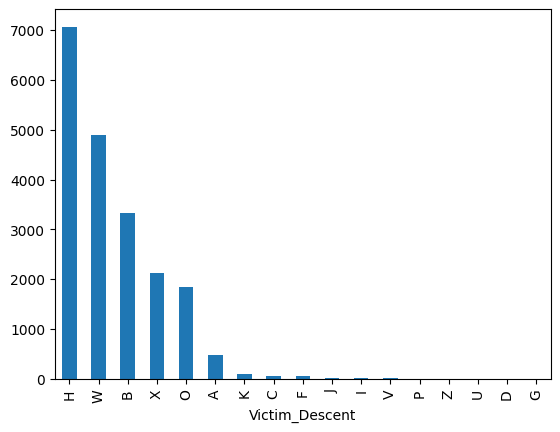

In [40]:
print('unique values are')
print(train['Victim_Descent'].unique())

print('')
print('')

print(train['Victim_Descent'].value_counts())

Victim_Descent_value_counts=train['Victim_Descent'].value_counts()

Victim_Descent_value_counts.plot(kind='bar')

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           20000 non-null  object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  object 
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  object 
 10  Part 1-2               20000 non-null  object 
 11  Modus_Operandi         20000 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             20000 non-null  object 
 14  Victim_Descent         20000 non-null  object 
 15  Pr

# Numerical Columns

# Date_Reported ,Date_Occurred

In [42]:
def day_category(x):
    if 400<=x<1200:
        return 'Morning'
    elif 1200<=x<1700:
        return 'Daytime'
    elif 1800<=x<2100:
        return 'Evening'
    else:
        return 'Night'
    
train['day_category']=train['Time_Occurred'].apply(day_category )   
train.drop('Time_Occurred',inplace=True,axis=1)

In [43]:

def extract_date(d):
    str(d)
    date=d.split(' ')[0]
    
    
    date=pd.to_datetime(date).date()
    
    
    return date
    
train['Date_Reported']=train['Date_Reported'].apply(extract_date)
train['Date_Occurred']=train['Date_Occurred'].apply(extract_date)
    
# k=train['Date_Reported'][0]-train['Date_Occurred'][0]
# k.days


#converting to datetime

train['Date_Reported']=pd.to_datetime(train['Date_Reported'])
train['Date_Occurred']=pd.to_datetime(train['Date_Occurred'])



train['Day_occured']=train['Date_Occurred'].dt.weekday
train['month_occured']=train['Date_Occurred'].dt.month




#this gives daysss anf time too 
train['reporting_delay_day_count']=(train['Date_Reported']-train['Date_Occurred'])

# this day count calculate the days count 
def day_count(d):
    return d.days
train['reporting_delay_day_count']=train['reporting_delay_day_count'].apply(day_count)




# dropping the date reported and date occured cols



In [44]:
train.loc[:,'month_occured']=train['month_occured'].astype('category')
train.loc[:,'Day_occured']=train['Day_occured'].astype('category')

In [45]:
print(train['Victim_Age'].unique())
# df.loc[df['Victim_Age']<0,'Victim_Age']=0
train.loc[train['Victim_Age']<0,'Victim_Age']=0

[75. 41. 67. 61.  0. 50. 68. 22. 31. 46. 72. 26. 38. 37. 42. 40. 53. 60.
 29. 13. 33. 27. 15. 23. 74. 63. 78. 51. 44. 34. 69. 36. 52. 25. 49. 48.
 32. 18. 35. 24. 39. 16. 28. 47. 30. 64. 76.  5. 58. 45. 57. 19. 55. 54.
 21. 65. 17. 20. 77. 82. 56. -2. 84. 59. 43.  7. 70. 66. 62. 14. 80. 71.
 81. 96. 12. 11.  4. 83. 10.  8.  6. 88. 86. 73.  9. 87. 85. 93. 95. 99.
 79.  3.  2. 91. 92. 90. 89. 98. -1. 94.]


In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Location                   20000 non-null  object        
 1   Cross_Street               20000 non-null  object        
 2   Latitude                   20000 non-null  float64       
 3   Longitude                  20000 non-null  float64       
 4   Date_Reported              20000 non-null  datetime64[ns]
 5   Date_Occurred              20000 non-null  datetime64[ns]
 6   Area_ID                    20000 non-null  object        
 7   Area_Name                  20000 non-null  object        
 8   Reporting_District_no      20000 non-null  object        
 9   Part 1-2                   20000 non-null  object        
 10  Modus_Operandi             20000 non-null  object        
 11  Victim_Age                 20000 non-null  float64       
 12  Vict

In [47]:
train['month_occured'].unique()

array([ 3,  2,  8, 11,  1,  7,  6,  9, 10, 12,  4,  5], dtype=int32)

In [48]:
train

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Area_ID,Area_Name,Reporting_District_no,Part 1-2,...,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category,activity_count,day_category,Day_occured,month_occured,reporting_delay_day_count
0,4500 CARPENTER AV,,34.1522,-118.3910,2020-03-09,2020-03-06,15.0,N Hollywood,Rest_Reporting_District_no,1.0,...,NaN,other_weapon,IC,Invest Cont,Property Crimes,1,Evening,4,3,3
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,2020-02-27,2020-02-27,13.0,Newton,Rest_Reporting_District_no,1.0,...,400.0,Physical Force,IC,Invest Cont,Property Crimes,8,Daytime,3,2,0
2,600 E MARTIN LUTHER KING JR BL,,34.0111,-118.2653,2020-08-21,2020-08-21,13.0,Newton,Rest_Reporting_District_no,2.0,...,NaN,sharp_heavy_object,IC,Invest Cont,Property Crimes,2,Morning,4,8,0
3,14900 ORO GRANDE ST,,34.2953,-118.4590,2020-11-08,2020-11-06,19.0,Mission,Rest_Reporting_District_no,1.0,...,NaN,Gun,IC,Invest Cont,Property Crimes,2,Evening,4,11,2
4,7100 S VERMONT AV,,33.9787,-118.2918,2020-02-25,2020-02-25,12.0,77th Street,Rest_Reporting_District_no,1.0,...,400.0,Physical Force,IC,Invest Cont,Property Crimes,6,Morning,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,5100 W ADAMS BL,,34.0334,-118.3523,2020-05-24,2020-05-24,3.0,Southwest,Rest_Reporting_District_no,2.0,...,400.0,Physical Force,IC,Invest Cont,Violent Crimes,4,Morning,6,5,0
19996,16900 ROSCOE BL,,34.2212,-118.5011,2020-12-25,2020-12-25,10.0,West Valley,Rest_Reporting_District_no,1.0,...,NaN,Physical Force,IC,Invest Cont,Property Crimes,5,Night,4,12,0
19997,1000 S SHENANDOAH ST,,34.0571,-118.3815,2020-09-25,2020-09-25,8.0,West LA,Rest_Reporting_District_no,1.0,...,NaN,sharp_heavy_object,IC,Invest Cont,Property Crimes,3,Daytime,4,9,0
19998,300 W SEPULVEDA ST,,33.7451,-118.2835,2020-06-10,2020-06-10,5.0,Harbor,Rest_Reporting_District_no,2.0,...,NaN,Physical Force,IC,Invest Cont,Crimes against Public Order,6,Morning,2,6,0


In [49]:
train['Day_occured'].unique()

array([4, 3, 1, 0, 6, 5, 2], dtype=int32)

In [50]:
print(train['Victim_Age'].unique())

[75. 41. 67. 61.  0. 50. 68. 22. 31. 46. 72. 26. 38. 37. 42. 40. 53. 60.
 29. 13. 33. 27. 15. 23. 74. 63. 78. 51. 44. 34. 69. 36. 52. 25. 49. 48.
 32. 18. 35. 24. 39. 16. 28. 47. 30. 64. 76.  5. 58. 45. 57. 19. 55. 54.
 21. 65. 17. 20. 77. 82. 56. 84. 59. 43.  7. 70. 66. 62. 14. 80. 71. 81.
 96. 12. 11.  4. 83. 10.  8.  6. 88. 86. 73.  9. 87. 85. 93. 95. 99. 79.
  3.  2. 91. 92. 90. 89. 98. 94.]


In [51]:
train.loc[:,'Victim_Age']=train.loc[:,'Victim_Age'].apply(lambda x : int(x))
train.loc[train['Victim_Age']==0,'Victim_Age']=train['Victim_Age'].mean()
# train.loc['Victim_Age']=train.loc['Victim_Age'].apply(lambda x: int(x))

In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Location                   20000 non-null  object        
 1   Cross_Street               20000 non-null  object        
 2   Latitude                   20000 non-null  float64       
 3   Longitude                  20000 non-null  float64       
 4   Date_Reported              20000 non-null  datetime64[ns]
 5   Date_Occurred              20000 non-null  datetime64[ns]
 6   Area_ID                    20000 non-null  object        
 7   Area_Name                  20000 non-null  object        
 8   Reporting_District_no      20000 non-null  object        
 9   Part 1-2                   20000 non-null  object        
 10  Modus_Operandi             20000 non-null  object        
 11  Victim_Age                 20000 non-null  float64       
 12  Vict

In [53]:
# plt.figure()

# sns.pairplot(train , diag_kind="hist")

# plt.show()

# Training Features

In [54]:
numerical_columns=['Latitude','Longitude','Victim_Age','activity_count','reporting_delay_day_count']
categorical_columns=['Area_ID','Part 1-2','Victim_Sex','Victim_Descent','Weapon_Description','Status','day_category','Day_occured','month_occured'] #ohe
multilabel_binarizer=[['Modus_Operandi']] 

new_train=train[['Latitude','Longitude','Victim_Age','activity_count','reporting_delay_day_count','Area_ID','Part 1-2','Victim_Sex','Victim_Descent','Weapon_Description','Status','day_category','Modus_Operandi']]
new_train_y=train['Crime_Category']






# new Column Transformer


In [55]:
from sklearn.compose import ColumnTransformer
import numpy as np
from sklearn.preprocessing import StandardScaler , OneHotEncoder  , LabelEncoder, RobustScaler

new_ct=ColumnTransformer(transformers=[
    
    ('numerical_cols' , StandardScaler(),['Latitude','Longitude','reporting_delay_day_count','Victim_Age','activity_count']),
    ('categorical_cols' , OneHotEncoder(handle_unknown='ignore',sparse_output=False),['day_category','Victim_Sex','Victim_Descent','Part 1-2','Area_ID','Status','Weapon_Description']),
    ('multi_label_binarizer', MultiLabelBinarizerWrapper(), 'Modus_Operandi'),
#     ('target_encoder',TargetEncoder(target_type='multiclass',random_state=42),'Premise_Code')
])

In [56]:
type(new_train_y)

pandas.core.series.Series

In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Location                   20000 non-null  object        
 1   Cross_Street               20000 non-null  object        
 2   Latitude                   20000 non-null  float64       
 3   Longitude                  20000 non-null  float64       
 4   Date_Reported              20000 non-null  datetime64[ns]
 5   Date_Occurred              20000 non-null  datetime64[ns]
 6   Area_ID                    20000 non-null  object        
 7   Area_Name                  20000 non-null  object        
 8   Reporting_District_no      20000 non-null  object        
 9   Part 1-2                   20000 non-null  object        
 10  Modus_Operandi             20000 non-null  object        
 11  Victim_Age                 20000 non-null  float64       
 12  Vict

In [58]:
new_train

,Latitude,Longitude,Victim_Age,activity_count,reporting_delay_day_count,Area_ID,Part 1-2,Victim_Sex,Victim_Descent,Weapon_Description,Status,day_category,Modus_Operandi
0,34.1522,-118.3910,75.0000,1,3,15.0,1.0,M,W,other_weapon,IC,Evening,0385
1,34.0028,-118.2391,41.0000,8,0,13.0,1.0,M,H,Physical Force,IC,Daytime,0906 0352 0371 0446 1822 0344 0416 0417
2,34.0111,-118.2653,67.0000,2,0,13.0,2.0,M,B,sharp_heavy_object,IC,Morning,0329 1202
3,34.2953,-118.4590,61.0000,2,2,19.0,1.0,M,H,Gun,IC,Evening,0329 1300
4,33.9787,-118.2918,30.1354,6,0,12.0,1.0,X,X,Physical Force,IC,Morning,0416 0945 1822 0400 0417 0344
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,34.0334,-118.3523,51.0000,4,0,3.0,2.0,M,H,Physical Force,IC,Morning,0416 0446 2004 0913
19996,34.2212,-118.5011,30.1354,5,0,10.0,1.0,M,W,Physical Force,IC,Night,1822 0209 0344 1414 1420
19997,34.0571,-118.3815,42.0000,3,0,8.0,1.0,M,H,sharp_heavy_object,IC,Daytime,0344 1822 1420
19998,33.7451,-118.2835,76.0000,6,0,5.0,2.0,F,H,Physical Force,IC,Morning,1202 2038 0913 0602 1242 0553


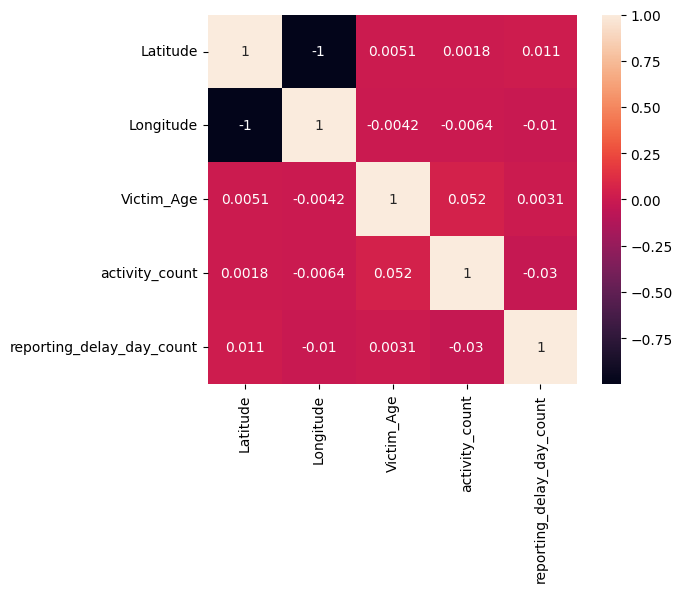

In [59]:
plt.figure()

sns.heatmap(new_train.select_dtypes([int, float]).corr() , square=True , annot=True)

plt.show()

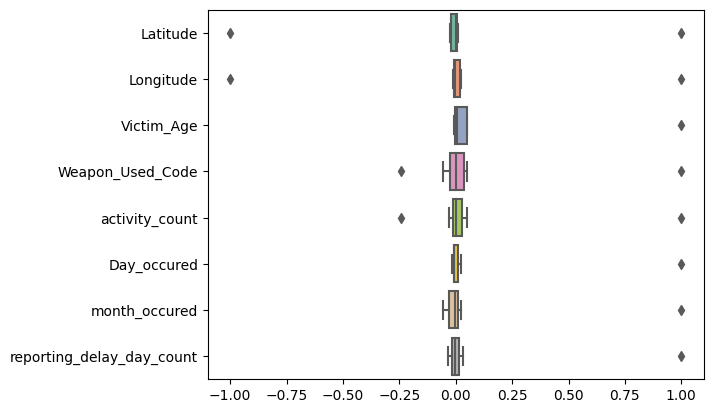

In [60]:
plt.figure()


sns.boxplot(data=train.select_dtypes([int, float]).corr() , orient="h" , palette='Set2')

plt.show()


In [61]:
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import accuracy_score,f1_score

# Label Encode target column 

In [62]:
# from sklearn.preprocessing import LabelEncoder

# label_ecoder=LabelEncoder()

# new_train_y=label_ecoder.fit_transform(train['Crime_Category'])
# new_train_y=pd.DataFrame(new_train_y)

# Rechecking the transformation of labels

In [63]:
# print(new_train_y.value_counts())

# print('')
# print('---------------------------------------')
# print('')


# train['Crime_Category'].value_counts()

# train_test_split

In [64]:
# df.shape

from sklearn.model_selection import train_test_split

xtrain_1 , xtest_1 , ytrain_1 , ytest_1 = train_test_split(new_train ,new_train_y ,test_size=0.3 , random_state=42 ,shuffle=True,stratify = new_train_y )

# Data Split

In [65]:
data_split= StratifiedKFold(n_splits=7 , shuffle=True, random_state=42)


# DummyClassifier

In [66]:
from sklearn.dummy import DummyClassifier

# data_split= StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


model_dummy=DummyClassifier(random_state=42 , strategy="most_frequent")

dummy_pipeline=Pipeline(steps=[('new_ct',new_ct),('model_dummy',model_dummy)])



accuracy_scores_dummy_pipeline = []
f1_scores_dummy_pipeline = []



for train_index, test_index in data_split.split(xtrain_1, ytrain_1):
    X_train, X_test = xtrain_1.iloc[train_index], xtrain_1.iloc[test_index]
    y_train, y_test = ytrain_1.iloc[train_index], ytrain_1.iloc[test_index]
    
    dummy_pipeline.fit(X_train, y_train)
    
    y_pred = dummy_pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy_scores_dummy_pipeline.append(accuracy)
    f1_scores_dummy_pipeline.append(f1)
    
    
    
    
    
    
    
print("Accuracy scores for each fold: ", accuracy_scores_dummy_pipeline)
print("Average accuracy: ", np.mean(accuracy_scores_dummy_pipeline))
print("F1 scores for each fold: ", f1_scores_dummy_pipeline)
print("Average F1 score: ", np.mean(f1_scores_dummy_pipeline))
    
    
    


Accuracy scores for each fold:  [0.5835, 0.5835, 0.5835, 0.5835, 0.583, 0.583, 0.583]
Average accuracy:  0.5832857142857143
F1 scores for each fold:  [0.4300249447426587, 0.4300249447426587, 0.4300249447426587, 0.4300249447426587, 0.4294238787113076, 0.4294238787113076, 0.4294238787113076]
Average F1 score:  0.42976734501493674


# KMEANs

In [67]:
# from sklearn.cluster import KMeans
# KMEANS = KMeans(init="random",n_clusters=400,n_init=50,max_iter=1000,random_state=0)
# kmeans=Pipeline(steps=[('new_ct',new_ct),('KMEANS',KMEANS)])

# kmeans.fit(xtrain_1, ytrain_1)
# # y_pred_kmeans = kmeans.predict(X_test)
# kmeans.score(xtest_1,ytest_1)
# # print(accuracy)


# MLP Classifier

In [68]:
# from sklearn.neural_network import MLPClassifier

# mlp_classifier=Pipeline(steps=[('new_ct',new_ct),('MLPClassifier',MLPClassifier(max_iter=900,random_state=1,shuffle=True,learning_rate='adaptive'))])

# mlp_classifier.fit(xtrain_1, ytrain_1)

# ypredicted_mlp_classifier=mlp_classifier.predict(xtest_1)

# print(   'mlp_classifier Score'   ,  mlp_classifier.score(xtest_1,ytest_1)  )


# print(   'mlp_classifier acuracy score'  ,     accuracy_score(ytest_1, ypredicted_mlp_classifier)    )

In [69]:
# from sklearn.model_selection  import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV

# param_grid_mlp_classifier = {
#     'MLPClassifier__hidden_layer_sizes': [(100, 50),(128,),(150,),(200,),(200,50),(150,50)],
#     'MLPClassifier__alpha': [0.1 ,0.5],
#     'MLPClassifier__activation':["tanh", "relu"]
# #     'MLPClassifier__learning_rate': ['adaptive'],
    
# #     'MLPClassifier__shuffle':[True]

# }


# MLP_RandomizedSearchCV = RandomizedSearchCV(
#          mlp_classifier, param_grid_mlp_classifier,
#            cv=5, n_iter=10, random_state=1,n_jobs=-1
#       )


# # MLP_grid_search = GridSearchCV(mlp_classifier, param_grid=param_grid_mlp_classifier, cv=data_split, scoring='accuracy', n_jobs=-1)
# MLP_RandomizedSearchCV.fit(xtrain_1, ytrain_1)
    
    
# print(   'MLP_grid_search Score'   ,  MLP_RandomizedSearchCV.score(xtest_1,ytest_1)  )
# print(MLP_RandomizedSearchCV.best_params_) 




# Result

# MLP_grid_search Score 0.8618333333333333
# {'MLPClassifier__hidden_layer_sizes': (150,), 'MLPClassifier__alpha': 0.1, 'MLPClassifier__activation': 'tanh'}

In [70]:
# from sklearn.neural_network import MLPClassifier


# MLP_classifier=Pipeline(steps=[('new_ct',new_ct),
#                                ('MLPClassifier',MLPClassifier(shuffle=True,learning_rate='adaptive',hidden_layer_sizes=(500,),max_iter=800,random_state=1,alpha=0.1,activation='tanh'))])



# model_score_MLP_classifier=[]
# accuracy_scores_MLP_classifier = []
# f1_scores_MLP_classifier = []

# for train_index, test_index in data_split.split(xtrain_1, ytrain_1):
#     X_train, X_test = xtrain_1.iloc[train_index], xtrain_1.iloc[test_index]
#     y_train, y_test = ytrain_1.iloc[train_index], ytrain_1.iloc[test_index]
    
#     MLP_classifier.fit(X_train, y_train)
    
#     y_pred_MLP_classifier = MLP_classifier.predict(X_test)
    
    
#     model_score=MLP_classifier.score(X_test,y_test)

#     accuracy = accuracy_score(y_test, y_pred_MLP_classifier)
    
#     f1 = f1_score(y_test, y_pred_MLP_classifier, average='weighted')
    
    
#     accuracy_scores_MLP_classifier.append(accuracy)
#     f1_scores_MLP_classifier.append(f1)
#     model_score_MLP_classifier.append(model_score)



  
    
# print('')
# print('-----------------------------------------------------------------')
# print('')
   


# print("Accuracy scores for each fold using mlp_classifier: ", accuracy_scores_MLP_classifier)
# print("Average accuracy using mlp_classifier: ", np.mean(accuracy_scores_MLP_classifier))
# print("F1 scores for each fold using mlp_classifier: ", f1_scores_MLP_classifier)
# print("Average F1 score using mlp_classifier: ", np.mean(f1_scores_MLP_classifier))
# print("model_score_test list  using mlp_classifier " ,model_score_MLP_classifier )
# print("average model_score_test list  using mlp_classifier " , np.mean(model_score_MLP_classifier ))


# print('')
# print('-----------------------------------------------------------------')
# print('')

# ytest_1_predicted_MLP_classifier=MLP_classifier.predict(xtest_1)
# print('decision_tree classifier bestmodel score ',MLP_classifier.score(xtest_1,ytest_1))
# print('decision_tree classifier bestmodel accuracy score ',accuracy_score( ytest_1 ,  ytest_1_predicted_MLP_classifier )   )


# print('')
# print('-----------------------------------------------------------------')
# print('')



# print(classification_report(ytest_1, MLP_classifier.predict(xtest_1)))

# print('')
# print('-----------------------------------------------------------------')
# print('')



# ConfusionMatrixDisplay.from_estimator(MLP_classifier, xtest_1, ytest_1,xticks_rotation='vertical')







# Logistic

Logistic Full Model

In [71]:
# from sklearn.linear_model import LogisticRegression

# pipe_logistic_model = Pipeline(steps=[('new_ct',new_ct),('logistic_reg',LogisticRegression( max_iter=1200 ,random_state=42))])

# model_score_test=[]
# accuracy_scores_logistic_pipeline = []
# f1_scores_logistic_pipeline = []



# for train_index, test_index in data_split.split(new_train, new_train_y):
#     X_train, X_test = new_train.iloc[train_index], new_train.iloc[test_index]
#     y_train, y_test = new_train_y.iloc[train_index], new_train_y.iloc[test_index]
    
#     pipe_logistic_model.fit(X_train, y_train)
    
#     y_pred_pipe_logistic_model = pipe_logistic_model.predict(X_test)
    
    
#     model_score=pipe_logistic_model.score(X_test,y_test)

#     accuracy = accuracy_score(y_test, y_pred_pipe_logistic_model)
#     f1 = f1_score(y_test, y_pred_pipe_logistic_model, average='weighted')
#     accuracy_scores_logistic_pipeline.append(accuracy)
#     f1_scores_logistic_pipeline.append(f1)
#     model_score_test.append(model_score)
    
    
    
    
    
    
    
# print("Accuracy scores for each fold using pipe_logistic_model: ", accuracy_scores_logistic_pipeline)
# print("Average accuracy using pipe_logistic_model: ", np.mean(accuracy_scores_logistic_pipeline))
# print("F1 scores for each fold using pipe_logistic_model: ", f1_scores_logistic_pipeline)
# print("Average F1 score using pipe_logistic_model: ", np.mean(f1_scores_logistic_pipeline))
# print("model_score_test list  using pipe_logistic_model " ,model_score_test )



# Accuracy scores for each fold using pipe_logistic_model:  [0.83425, 0.82275, 0.83175, 0.8265, 0.8315]
# Average accuracy using pipe_logistic_model:  0.82935
# F1 scores for each fold using pipe_logistic_model:  [0.8255777923734429, 0.8158475228942185, 0.8238784670202315, 0.8192799452863958, 0.821603454847757]
# Average F1 score using pipe_logistic_model:  0.8212374364844092
# model_score_test list  using pipe_logistic_model  [0.83425, 0.82275, 0.83175, 0.8265, 0.8315]





Logistic Half model

In [72]:
# from sklearn.linear_model import LogisticRegression

# pipe_logistic_model_2 = Pipeline(steps=[('new_ct',new_ct),('logistic_reg',LogisticRegression( max_iter=1200 ,random_state=42))])

# model_score_test=[]
# accuracy_scores_logistic_pipeline = []
# f1_scores_logistic_pipeline = []



# for train_index, test_index in data_split.split(xtrain_1, ytrain_1):
#     X_train, X_test = xtrain_1.iloc[train_index], xtrain_1.iloc[test_index]
#     y_train, y_test = ytrain_1.iloc[train_index], ytrain_1.iloc[test_index]
    
#     pipe_logistic_model_2.fit(X_train, y_train)
    
#     y_pred_pipe_logistic_model_2 = pipe_logistic_model_2.predict(X_test)
    
    
#     model_score=pipe_logistic_model_2.score(X_test,y_test)

#     accuracy = accuracy_score(y_test, y_pred_pipe_logistic_model_2)
#     f1 = f1_score(y_test, y_pred_pipe_logistic_model_2, average='weighted')
#     accuracy_scores_logistic_pipeline.append(accuracy)
#     f1_scores_logistic_pipeline.append(f1)
#     model_score_test.append(model_score)
    
    
    
    
    
    
    
# print("Accuracy scores for each fold using pipe_logistic_model: ", accuracy_scores_logistic_pipeline)
# print("Average accuracy using pipe_logistic_model: ", np.mean(accuracy_scores_logistic_pipeline))
# print("F1 scores for each fold using pipe_logistic_model: ", f1_scores_logistic_pipeline)
# print("Average F1 score using pipe_logistic_model: ", np.mean(f1_scores_logistic_pipeline))
# print("model_score_test list  using pipe_logistic_model " ,model_score_test )




# SVC


In [73]:
from sklearn.svm import SVC
svc=Pipeline(steps=[('new_ct',new_ct),('svc',SVC(random_state=1,decision_function_shape='ovr'))])
svc.fit(xtrain_1, ytrain_1)

ypredicted_svc=svc.predict(xtest_1)

print(   'SVC Score'   ,  svc.score(xtest_1,ytest_1)  )


print(   'SVC acuracy score'  ,     accuracy_score(ytest_1, ypredicted_svc)    )

SVC Score 0.8538333333333333
SVC acuracy score 0.8538333333333333


# SVC Hyperparameter tuning using GridSearchCV

In [74]:
# from sklearn.model_selection  import GridSearchCV

# param_grid = {
#     'svc__C': [0.01, 0.1, 1,10, 15] ,                     
# }

# SVC_grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=data_split, n_jobs=-1, verbose=2, scoring='accuracy')
# SVC_grid_search.fit(xtrain_1, ytrain_1)



# print('')
# print('-----------------------------------------------------------------')
# print('')

# print('score' ,SVC_grid_search.score(xtest_1, ytest_1) )

# print('')
# print('-----------------------------------------------------------------')
# print('')



# print(SVC_grid_search.best_params_)


# Fitting 5 folds for each of 5 candidates, totalling 35 fits

# -----------------------------------------------------------------

# score 0.8681666666666666

# -----------------------------------------------------------------

# {'svc__C': 10}







#[0.1, 1, 10],'svc__gamma': ['scale', 'auto', 0.01, 0.1, 1], 'svc__kernel': ['rbf', 'poly', 'sigmoid']
# Fitting 3 folds for each of 45 candidates, totalling 135 fits

# -----------------------------------------------------------------

# score 0.865

# -----------------------------------------------------------------

# intially--------------->>>>>>>>>      {'svc__C': 1, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}

# RandomizedSearchCV

Also tried out hpt using randomizedsearchcv but was not making model better

In [75]:
# from sklearn.model_selection import RandomizedSearchCV
# param_grid = {
#     #'svc__C': [0.1, 1, 10],  
#              'svc__C' :np.logspace(-2, 15,2 )
#     #'svc__gamma': ['scale', 'auto', 0.01, 0.1, 1], 
#      #'svc__kernel': ['rbf', 'poly', 'sigmoid'] 
#  }
# SVC_RandomizedSearchCV = RandomizedSearchCV(
#          pipe_svc_half, param_grid,
#            cv=3, n_iter=10, random_state=1
#       )
# SVC_RandomizedSearchCV.fit(xtrain_1,ytrain_1)




# SVC_RandomizedSearchCV.score(xtest_1,ytest_1)

# 0.8636666666666667

# {'svc__kernel': 'rbf', 'svc__gamma': 'scale', 'svc__C': 10}



-----------------------------------------------------------------

Accuracy scores for each fold using svc_best_model:  [0.868, 0.8445, 0.858, 0.8595, 0.8455, 0.8575, 0.8435]
Average accuracy using svc_best_model:  0.8537857142857143
F1 scores for each fold using svc_best_model:  [0.8609816361910376, 0.8355582548537371, 0.8490266602556396, 0.8504242265690457, 0.8352478752425045, 0.8497117519837559, 0.8343810744429024]
Average F1 score using svc_best_model:  0.8450473542198031
model_score_test list  using svc_best_model  [0.868, 0.8445, 0.858, 0.8595, 0.8455, 0.8575, 0.8435]
model_score_test list  using svc_best_model  0.8537857142857143

-----------------------------------------------------------------

svc_best_model classifier bestmodel score  0.8506666666666667
svc_best_model classifier bestmodel accuracy score  0.8506666666666667

-----------------------------------------------------------------



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                               precision    recall  f1-score   support

       Crimes against Persons       0.76      0.28      0.41        68
  Crimes against Public Order       0.73      0.54      0.62       542
Fraud and White-Collar Crimes       0.87      0.71      0.78       406
                 Other Crimes       0.00      0.00      0.00        54
              Property Crimes       0.89      0.96      0.92      3500
               Violent Crimes       0.77      0.81      0.79      1430

                     accuracy                           0.85      6000
                    macro avg       0.67      0.55      0.59      6000
                 weighted avg       0.84      0.85      0.84      6000


-----------------------------------------------------------------



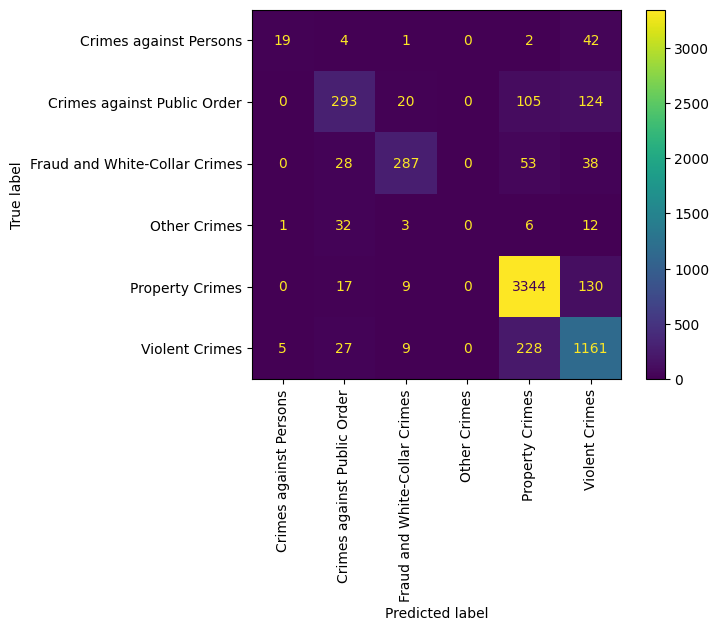

In [76]:
from sklearn.svm import SVC
svc_best_model=Pipeline(steps=[('new_ct',new_ct),('svc',SVC(random_state=1 ,kernel='rbf' , C=1 ,gamma='scale',decision_function_shape='ovr' ))])


model_score_svc_best_model=[]
accuracy_scores_svc_best_model = []
f1_scores_svc_best_model = []



for train_index, test_index in data_split.split(xtrain_1, ytrain_1):
    X_train, X_test = xtrain_1.iloc[train_index], xtrain_1.iloc[test_index]
    y_train, y_test = ytrain_1.iloc[train_index], ytrain_1.iloc[test_index]
    
    svc_best_model.fit(X_train, y_train)
    
    y_pred_svc_best_model = svc_best_model.predict(X_test)
    
    
    model_score_svc=svc_best_model.score(X_test,y_test)
    

    accuracy_svc = accuracy_score(y_test, y_pred_svc_best_model)
    
    
    f1_svc = f1_score(y_test, y_pred_svc_best_model, average='weighted')
    
    
    accuracy_scores_svc_best_model.append(accuracy_svc)
    f1_scores_svc_best_model.append(f1_svc)
    model_score_svc_best_model.append(model_score_svc)
    
    
    
print('')
print('-----------------------------------------------------------------')
print('')
   
    
    
    
print(   "Accuracy scores for each fold using svc_best_model: ",     accuracy_scores_svc_best_model  )
print(   "Average accuracy using svc_best_model: ",                  np.mean(accuracy_scores_svc_best_model))
print(   "F1 scores for each fold using svc_best_model: ",           f1_scores_svc_best_model)
print(   "Average F1 score using svc_best_model: ",                  np.mean(f1_scores_svc_best_model))
print(   "model_score_test list  using svc_best_model " ,model_score_svc_best_model )
print(    "model_score_test list  using svc_best_model " , np.mean(model_score_svc_best_model) )

print('')
print('-----------------------------------------------------------------')
print('')

ytest_1_predicted_svc_bestmodel=svc_best_model.predict(xtest_1)
print('svc_best_model classifier bestmodel score ',svc_best_model.score(xtest_1,ytest_1))
print('svc_best_model classifier bestmodel accuracy score ',accuracy_score( ytest_1 ,  ytest_1_predicted_svc_bestmodel )   )


print('')
print('-----------------------------------------------------------------')
print('')



print(classification_report(ytest_1, svc_best_model.predict(xtest_1)))

print('')
print('-----------------------------------------------------------------')
print('')



ConfusionMatrixDisplay.from_estimator(svc_best_model, xtest_1, ytest_1,xticks_rotation='vertical')



In [77]:
from sklearn.svm import SVC
pipe_svc_full=Pipeline(steps=[('new_ct',new_ct),('svc',SVC(random_state=1 ,kernel='rbf' , C=10 ,gamma='scale',decision_function_shape='ovr' ))])


model_score_test_full=[]
accuracy_scores_SVC_full = []
f1_scores_SVC_full = []



for train_index, test_index in data_split.split(new_train, new_train_y):
    X_train, X_test = new_train.iloc[train_index], new_train.iloc[test_index]
    y_train, y_test = new_train_y.iloc[train_index], new_train_y.iloc[test_index]
    
    pipe_svc_full.fit(X_train, y_train)
    
    y_pred_svc_full = pipe_svc_full.predict(X_test)
    
    
    model_score_svc=pipe_svc_full.score(X_test,y_test)

    accuracy_svc = accuracy_score(y_test, y_pred_svc_full)
    
    f1_svc = f1_score(y_test, y_pred_svc_full, average='weighted')
    
    
    accuracy_scores_SVC_full.append(accuracy_svc)
    f1_scores_SVC_full.append(f1_svc)
    model_score_test_full.append(model_score_svc)
    
    
    
    
    
    
    
print("Accuracy scores for each fold using pipe_logistic_model: ", accuracy_scores_SVC_full)
print("Average accuracy using pipe_logistic_model: ", np.mean(accuracy_scores_SVC_full))
print("F1 scores for each fold using pipe_logistic_model: ", f1_scores_SVC_full)
print("Average F1 score using pipe_logistic_model: ", np.mean(f1_scores_SVC_full))
print("model_score_test list  using pipe_logistic_model " ,model_score_test_full )



Accuracy scores for each fold using pipe_logistic_model:  [0.8635409377186843, 0.8582429121456073, 0.8627931396569829, 0.8627931396569829, 0.8648932446622332, 0.8575428771438572, 0.8683934196709836]
Average accuracy using pipe_logistic_model:  0.8625999529507616
F1 scores for each fold using pipe_logistic_model:  [0.8578368542661594, 0.853570118934206, 0.8589929438666702, 0.859176731318999, 0.8603285212993592, 0.8519162348924793, 0.8634158777949293]
Average F1 score using pipe_logistic_model:  0.8578910403389717
model_score_test list  using pipe_logistic_model  [0.8635409377186843, 0.8582429121456073, 0.8627931396569829, 0.8627931396569829, 0.8648932446622332, 0.8575428771438572, 0.8683934196709836]


# KNN

In [78]:
# from sklearn.neighbors import KNeighborsClassifier
# knn_classifier=Pipeline(steps=[('new_ct' , new_ct ),( 'knn' ,KNeighborsClassifier())])
# knn_classifier.fit(xtrain_1, ytrain_1)

# ypredicted_knn_classifier=knn_classifier.predict(xtest_1)

# print(   'KNeighborsClassifier Score'   ,  knn_classifier.score(xtest_1,ytest_1)  )


# print(   'KNeighborsClassifier acuracy score'  ,     accuracy_score(ytest_1, ypredicted_knn_classifier)    )

# KNN HPT Using GridSearchCV

In [79]:
# param_grid = {
#     'knn__n_neighbors': [16,24,32,36], 
#     'knn__leaf_size': [20,28, 35, 40],
#     'knn__metric': ["manhattan"],
#     'knn__weights': ["distance"],
#     'knn__p':[1,2]
# }
# KNN_grid_search = GridSearchCV(knn_classifier,param_grid, cv=data_split, scoring='accuracy', n_jobs=-1)
# KNN_grid_search.fit(xtrain_1,ytrain_1)

# print('Test score of KNN_grid_search ',KNN_grid_search.score(xtest_1,ytest_1))
# print('Best Parameter are' ,KNN_grid_search.best_params_ )




# Test score of KNN_grid_search  0.8175
# Best Parameter are {'knn__leaf_size': 20, 'knn__metric': 'manhattan', 'knn__n_neighbors': 16, 'knn__p': 1, 'knn__weights': 'distance'}


In [80]:
# from sklearn.neighbors import KNeighborsClassifier
# knn_classifier_half=Pipeline(steps=[('new_ct' , new_ct ),( 'knn' ,KNeighborsClassifier(n_neighbors=16 , p=1,leaf_size=19 ,weights='distance'))])

# KNN_model_score_test_half=[]
# accuracy_scores_KNN_half = []
# f1_scores_KNN_half = []



# for train_index, test_index in data_split.split(xtrain_1, ytrain_1):
#     X_train, X_test = xtrain_1.iloc[train_index], xtrain_1.iloc[test_index]
#     y_train, y_test = ytrain_1.iloc[train_index], ytrain_1.iloc[test_index]
    
#     knn_classifier_half.fit(X_train, y_train)
    
#     y_pred_KNN_half = knn_classifier_half.predict(X_test)
    
    
#     model_score_KNN=knn_classifier_half.score(X_test,y_test)
    

#     accuracy_KNN = accuracy_score(y_test, y_pred_KNN_half)
    
    
#     f1_KNN = f1_score(y_test, y_pred_KNN_half, average='weighted')
    
    
#     accuracy_scores_KNN_half.append(accuracy_KNN)
    
#     f1_scores_KNN_half.append(f1_KNN)
    
#     KNN_model_score_test_half.append(model_score_KNN)
    
    
    
    
    
    
    
# print("Accuracy scores for each fold using pipe_logistic_model: ", accuracy_scores_KNN_half)
# print("Average accuracy using pipe_logistic_model: ", np.mean(accuracy_scores_KNN_half))
# print("F1 scores for each fold using pipe_logistic_model: ", f1_scores_KNN_half)
# print("Average F1 score using pipe_logistic_model: ", np.mean(f1_scores_KNN_half))
# print("model_score_test list  using pipe_logistic_model " ,KNN_model_score_test_half )


In [81]:
# from sklearn.neighbors import KNeighborsClassifier
# knn_classifier_full=Pipeline(steps=[('new_ct' , new_ct ),( 'knn' ,KNeighborsClassifier(n_neighbors=16 , p=1,leaf_size=19 ,weights='distance'))])

# KNN_model_score_test_full=[]
# accuracy_scores_KNN_full = []
# f1_scores_KNN_full = []



# for train_index, test_index in data_split.split(new_train, new_train_y):
#     X_train, X_test = new_train.iloc[train_index], new_train.iloc[test_index]
#     y_train, y_test = new_train_y.iloc[train_index], new_train_y.iloc[test_index]
    
#     knn_classifier_full.fit(X_train, y_train)
    
#     y_pred_KNN_full = knn_classifier_full.predict(X_test)
    
    
#     model_score_KNN=knn_classifier_full.score(X_test,y_test)
    

#     accuracy_KNN = accuracy_score(y_test, y_pred_KNN_full)
    
    
#     f1_KNN = f1_score(y_test, y_pred_KNN_full, average='weighted')
    
    
#     accuracy_scores_KNN_full.append(accuracy_KNN)
    
#     f1_scores_KNN_full.append(f1_KNN)
    
#     KNN_model_score_test_full.append(model_score_KNN)
    
    
    
    
    
    
    
# print("Accuracy scores for each fold using knn_classifier_full:    ", accuracy_scores_KNN_full)
# print("Average accuracy using knn_classifier_full: ", np.mean(accuracy_scores_KNN_full))
# print("F1 scores for each fold using knn_classifier_full: ", f1_scores_KNN_full)
# print("Average F1 score using knn_classifier_full: ", np.mean(f1_scores_KNN_full))
# print("model_score_test list  using knn_classifier_full " ,KNN_model_score_test_full )


# Desision tree

In [82]:
from sklearn.tree import DecisionTreeClassifier


dc_tree= Pipeline([   ('new_ct',new_ct)  ,   ( 'DecisionTreeClassifier' ,  DecisionTreeClassifier(random_state=1)  )   ])
dc_tree.fit(xtrain_1, ytrain_1)





print(  'dc_tree model score'  ,  dc_tree.score(xtest_1,ytest_1)  )

ypred_dc_tree=dc_tree.predict(xtest_1)

print(  'Accuracy Score '     ,    accuracy_score(ytest_1,ypred_dc_tree))


dc_tree model score 0.8025
Accuracy Score  0.8025


# Decision Tree HPT using Grid Search

In [83]:
# from sklearn.model_selection import GridSearchCV

# decision_tree_params={'DecisionTreeClassifier__max_depth': [7,9,11,13,17] ,
#                       'DecisionTreeClassifier__min_samples_split':[4,6,8,10],
                      
#                       'DecisionTreeClassifier__criterion':['gini', 'entropy'],
#                       'DecisionTreeClassifier__min_samples_leaf':[4,6,5]
          
# }

# # data_split= StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
# grid_search_decision_tree = GridSearchCV(dc_tree, param_grid=decision_tree_params, cv=data_split, scoring='accuracy')

# grid_search_decision_tree.fit(xtrain_1, ytrain_1)

# print('Test score of grid_search_decision_tree ',grid_search_decision_tree.score(xtest_1,ytest_1))


# print('')
# print('-----------------------------------------------------------------')
# print('')


# print('Best Parameter are' ,grid_search_decision_tree.best_params_ )


# Test score of grid_search_decision_tree  0.8491666666666666

# -----------------------------------------------------------------

# Best Parameter are {'DecisionTreeClassifier__criterion': 'gini',
#                     'DecisionTreeClassifier__max_depth': 9, 
#                     'DecisionTreeClassifier__min_samples_leaf': 6,
#                     'DecisionTreeClassifier__min_samples_split': 4}

# Decision tree best parameter model

-----------------------------------------------------------------

Accuracy scores for each fold using DecisionTreeBestModel:  [0.85, 0.8445, 0.8475, 0.8465, 0.849, 0.8455, 0.8375]
Average accuracy using DecisionTreeBestModel:  0.8457857142857145
F1 scores for each fold using DecisionTreeBestModel:  [0.8461586316312644, 0.8392290635101278, 0.8439061888804882, 0.8436186221257163, 0.8446025272523127, 0.8394113055797636, 0.8319031304147664]
Average F1 score using DecisionTreeBestModel:  0.8412613527706343
model_score_test list  using DecisionTreeBestModel  [0.85, 0.8445, 0.8475, 0.8465, 0.849, 0.8455, 0.8375]
Average model_score_test list  DecisionTreeBestModel decision  0.8457857142857145

-----------------------------------------------------------------

decision_tree classifier bestmodel score  0.842
decision_tree classifier bestmodel accuracy score  0.842

-----------------------------------------------------------------



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                               precision    recall  f1-score   support

       Crimes against Persons       0.71      0.43      0.53        68
  Crimes against Public Order       0.69      0.57      0.62       542
Fraud and White-Collar Crimes       0.85      0.74      0.79       406
                 Other Crimes       0.00      0.00      0.00        54
              Property Crimes       0.91      0.92      0.92      3500
               Violent Crimes       0.73      0.83      0.78      1430

                     accuracy                           0.84      6000
                    macro avg       0.65      0.58      0.61      6000
                 weighted avg       0.83      0.84      0.84      6000


-----------------------------------------------------------------



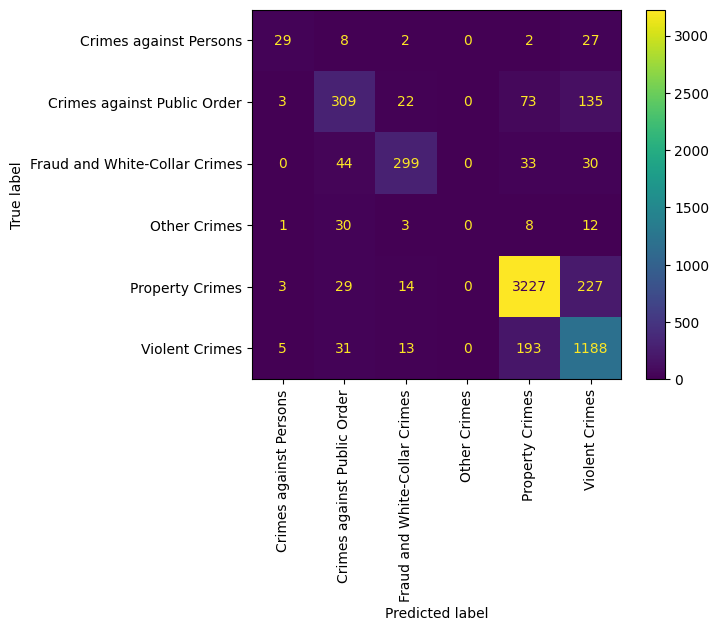

In [84]:
decision_tree_classifier_bestmodel = DecisionTreeClassifier(criterion="gini", max_depth=9, min_samples_leaf=6, min_samples_split=4, random_state=1)


DecisionTreeBestModel= Pipeline([ ('new_ct',new_ct),
                                 ('DecisionTreeClassifier',decision_tree_classifier_bestmodel)
                                ])



DecisionTreeBestModel_score_test_half=[]
accuracy_scores_DecisionTreeBestModel_half = []
f1_scores_DecisionTreeBestModel_half = []

for train_index, test_index in data_split.split(xtrain_1, ytrain_1):
    X_train, X_test = xtrain_1.iloc[train_index], xtrain_1.iloc[test_index]
    y_train, y_test = ytrain_1.iloc[train_index], ytrain_1.iloc[test_index]
    
    DecisionTreeBestModel.fit(X_train, y_train)
    
    y_pred_DecisionTreeBestModel_half = DecisionTreeBestModel.predict(X_test)
    
    
    model_score_decision_tree=DecisionTreeBestModel.score(X_test,y_test)
    

    accuracy_decision_tree = accuracy_score(y_test, y_pred_DecisionTreeBestModel_half)
    
    
    f1_decision_tree = f1_score(y_test, y_pred_DecisionTreeBestModel_half, average='weighted')
    
    
    accuracy_scores_DecisionTreeBestModel_half.append(accuracy_decision_tree)
    
    f1_scores_DecisionTreeBestModel_half.append(f1_decision_tree)
    
    DecisionTreeBestModel_score_test_half.append(model_score_decision_tree)
    
    
print('-----------------------------------------------------------------')
print('')
 
    
    
print("Accuracy scores for each fold using DecisionTreeBestModel: ", accuracy_scores_DecisionTreeBestModel_half)
print("Average accuracy using DecisionTreeBestModel: ", np.mean(accuracy_scores_DecisionTreeBestModel_half))
print("F1 scores for each fold using DecisionTreeBestModel: ", f1_scores_DecisionTreeBestModel_half)
print("Average F1 score using DecisionTreeBestModel: ", np.mean(f1_scores_DecisionTreeBestModel_half))
print("model_score_test list  using DecisionTreeBestModel " ,DecisionTreeBestModel_score_test_half )
print("Average model_score_test list  DecisionTreeBestModel decision " ,np.mean(DecisionTreeBestModel_score_test_half ))


print('')
print('-----------------------------------------------------------------')
print('')

ytest_1_predicted_DecisionTreeBestModel=DecisionTreeBestModel.predict(xtest_1)
print('decision_tree classifier bestmodel score ',DecisionTreeBestModel.score(xtest_1,ytest_1))

print('decision_tree classifier bestmodel accuracy score ',accuracy_score( ytest_1 ,  ytest_1_predicted_DecisionTreeBestModel )   )

print('')
print('-----------------------------------------------------------------')
print('')



print(classification_report(ytest_1, DecisionTreeBestModel.predict(xtest_1)))

print('')
print('-----------------------------------------------------------------')
print('')



ConfusionMatrixDisplay.from_estimator(DecisionTreeBestModel, xtest_1, ytest_1,xticks_rotation='vertical')



In [85]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.pipeline import Pipeline

# decision_tree_full = Pipeline([ ('new_ct',new_ct),('DecisionTreeClassifier',DecisionTreeClassifier(criterion="gini", max_depth=9, min_samples_leaf=5, min_samples_split=4, random_state=1))])


# decision_tree_model_score_test_full=[]
# accuracy_scores_decision_tree_full = []
# f1_scores_decision_tree_full = []



# for train_index, test_index in data_split.split(new_train, new_train_y):
#     X_train, X_test = new_train.iloc[train_index], new_train.iloc[test_index]
#     y_train, y_test = new_train_y.iloc[train_index], new_train_y.iloc[test_index]
    
#     decision_tree_full.fit(X_train, y_train)
    
#     y_pred_decision_tree_full = decision_tree_full.predict(X_test)
    
    
#     model_score_decision_tree=decision_tree_full.score(X_test,y_test)
    

#     accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree_full)
    
    
#     f1_decision_tree = f1_score(y_test, y_pred_decision_tree_full, average='weighted')
    
    
#     accuracy_scores_decision_tree_full.append(accuracy_decision_tree)
    
#     f1_scores_decision_tree_full.append(f1_decision_tree)
    
#     decision_tree_model_score_test_full.append(model_score_decision_tree)
    
    
    
    
# print("Accuracy scores for each fold using decision_tree_full: ", accuracy_scores_decision_tree_full)
# print("Average accuracy using decision_tree_full: ", np.mean(accuracy_scores_decision_tree_full))
# print("F1 scores for each fold using decision_tree_full: ", f1_scores_decision_tree_full)
# print("Average F1 score using decision_tree_full: ", np.mean(f1_scores_decision_tree_full))
# print("model_score_test list  using decision_tree_full " ,decision_tree_model_score_test_full )

# **Ensemble Models**

In [86]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoostClassifier not good as test score and accuracy score was in range of 77-79


# Bagging Classifier 

In [87]:
from sklearn.ensemble import BaggingClassifier
# bagging_classifier = Pipeline(
#     steps=[('new_ct',new_ct), ("classifier", BaggingClassifier(random_state=1))]
# )

# bagging_classifier.fit(xtrain_1,ytrain_1)
# ypred_bag=bagging_classifier.predict(xtest_1)

# print("bagging_classifier score",bagging_classifier.score(xtest_1,ytest_1))

# print('bagging_classifier accuracy score' , accuracy_score(ytest_1,ypred_bag))

#  HistGradientBoostingClassifier


In [88]:
from sklearn.ensemble import HistGradientBoostingClassifier
histGradientBoostingClassifier=Pipeline([('new_ct',new_ct),('HGB',HistGradientBoostingClassifier(random_state=1))])
histGradientBoostingClassifier.fit(xtrain_1, ytrain_1)



ypred_histgradient=histGradientBoostingClassifier.predict(xtest_1)

print("histGradientBoostingClassifier score",histGradientBoostingClassifier.score(xtest_1,ytest_1))

print('histGradientBoostingClassifier accuracy score' , accuracy_score(ytest_1,ypred_histgradient))

histGradientBoostingClassifier score 0.8666666666666667
histGradientBoostingClassifier accuracy score 0.8666666666666667


# HistGB Hpt

In [89]:
# from sklearn.model_selection import RandomizedSearchCV
# param_grid_hist_gb = {'HGB__learning_rate': [ 0.1,0.4],
#                       'HGB__max_depth': [None,3, 5, 7],
                    
#                       'HGB__max_iter': [100, 200],'HGB__l2_regularization': [0, 0.1,1]
   
# }


# rs_hist_gb = RandomizedSearchCV(histGradientBoostingClassifier, param_grid_hist_gb, cv=data_split, scoring='accuracy',n_jobs=-1)

# rs_hist_gb.fit(xtrain_1, ytrain_1)

# print('Test score of histGradientBoostingClassifier ',rs_hist_gb.score(xtest_1,ytest_1))


# print('')
# print('-----------------------------------------------------------------')
# print('')


# print('Best Parameter are' ,rs_hist_gb.best_params_ )








# Test score of histGradientBoostingClassifier  0.8675

# -----------------------------------------------------------------

# Best Parameter are {'HGB__max_iter': 200, 'HGB__max_depth': None, 'HGB__learning_rate': 0.1, 'HGB__l2_regularization': 1}


Accuracy scores for each fold using accuracy_scores_HGB_CLF_best:  [0.8757142857142857, 0.8675, 0.8671428571428571, 0.87, 0.8689285714285714]
Average accuracy using accuracy_scores_HGB_CLF_best:  0.8698571428571429
F1 scores for each fold using f1_scores_HGB_CLF_best:  [0.870304660707773, 0.8627200474746912, 0.8617902454895768, 0.8648468374831612, 0.865064911652484]
Average F1 score using f1_scores_HGB_CLF_best:  0.8649453405615372
model_score_test list  using HGB_CLF_best_model_score_test_half  [0.8757142857142857, 0.8675, 0.8671428571428571, 0.87, 0.8689285714285714]

-----------------------------------------------------------------

histGradientBoostingClassifier  bestmodel score  0.863
histGradientBoostingClassifier  bestmodel accuracy score  0.863

-----------------------------------------------------------------

                               precision    recall  f1-score   support

       Crimes against Persons       0.69      0.50      0.58        68
  Crimes against Public Or

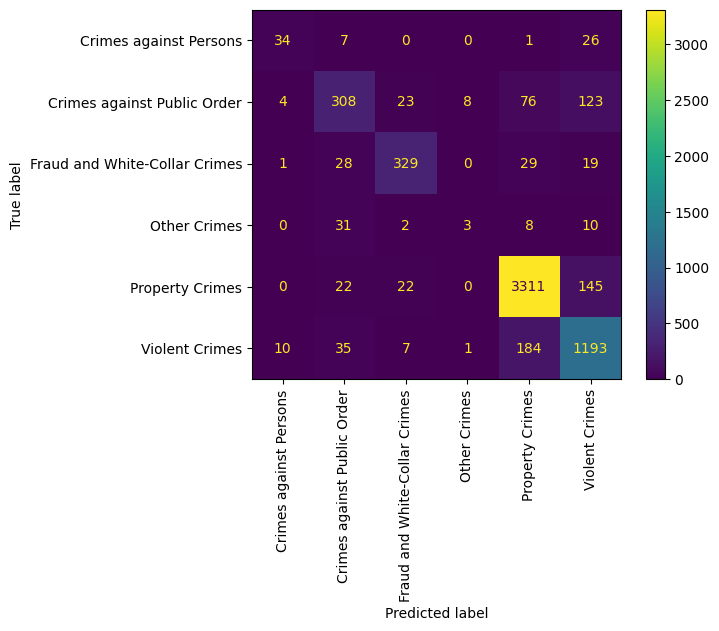

In [90]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold

HGB_CLF_best=Pipeline([('new_ct',new_ct),('histGradientBoostingClassifier',HistGradientBoostingClassifier(max_iter=200 , random_state=1,max_depth=None ,learning_rate=0.1,l2_regularization=1) )])


HGB_data_split=StratifiedKFold(n_splits=5,  shuffle=True, random_state=1)

HGB_CLF_best_model_score_test_half=[]
accuracy_scores_HGB_CLF_best = []
f1_scores_HGB_CLF_best = []



for train_index, test_index in HGB_data_split.split(xtrain_1, ytrain_1):
    X_train, X_test = xtrain_1.iloc[train_index], xtrain_1.iloc[test_index]
    y_train, y_test = ytrain_1.iloc[train_index], ytrain_1.iloc[test_index]
    
    HGB_CLF_best.fit(X_train, y_train)
    
    y_pred_HGB_CLF_best = HGB_CLF_best.predict(X_test)
    
    
    model_score_HGB_CLF_best=HGB_CLF_best.score(X_test,y_test)
    

    accuracy_HGB_CLF_best = accuracy_score(y_test, y_pred_HGB_CLF_best)
    
    
    f1_HGB_CLF_best = f1_score(y_test, y_pred_HGB_CLF_best, average='weighted')
    
    
    accuracy_scores_HGB_CLF_best.append(accuracy_HGB_CLF_best)
    
    f1_scores_HGB_CLF_best.append(f1_HGB_CLF_best)
    
    HGB_CLF_best_model_score_test_half.append(model_score_HGB_CLF_best)


print("Accuracy scores for each fold using accuracy_scores_HGB_CLF_best: ", accuracy_scores_HGB_CLF_best)
print("Average accuracy using accuracy_scores_HGB_CLF_best: ", np.mean(accuracy_scores_HGB_CLF_best))
print("F1 scores for each fold using f1_scores_HGB_CLF_best: ", f1_scores_HGB_CLF_best)
print("Average F1 score using f1_scores_HGB_CLF_best: ", np.mean(f1_scores_HGB_CLF_best))
print("model_score_test list  using HGB_CLF_best_model_score_test_half " ,HGB_CLF_best_model_score_test_half )


print('')
print('-----------------------------------------------------------------')
print('')

ytest_1_predicted_HGB_CLF_best=HGB_CLF_best.predict(xtest_1)
print('histGradientBoostingClassifier  bestmodel score ',HGB_CLF_best.score(xtest_1,ytest_1))

print('histGradientBoostingClassifier  bestmodel accuracy score ',accuracy_score( ytest_1 ,  ytest_1_predicted_HGB_CLF_best )   )

print('')
print('-----------------------------------------------------------------')
print('')



print(classification_report(ytest_1, HGB_CLF_best.predict(xtest_1)))

print('')
print('-----------------------------------------------------------------')
print('')



ConfusionMatrixDisplay.from_estimator(HGB_CLF_best, xtest_1, ytest_1,xticks_rotation='vertical')




In [91]:
from sklearn.ensemble import HistGradientBoostingClassifier


HGB_CLF_final=Pipeline([('new_ct',new_ct),('histGradientBoostingClassifier',HistGradientBoostingClassifier(max_iter=200 , random_state=1,max_depth=None ,learning_rate=0.1,l2_regularization=1) )])

HGB_CLF_final_model_score=[]
accuracy_scores_HGB_CLF_final = []
f1_scores_HGB_CLF_final = []



for train_index, test_index in HGB_data_split.split(new_train, new_train_y):
    X_train, X_test = new_train.iloc[train_index], new_train.iloc[test_index]
    y_train, y_test = new_train_y.iloc[train_index], new_train_y.iloc[test_index]
    
    HGB_CLF_final.fit(X_train, y_train)
    
    y_pred_HGB_CLF_final = HGB_CLF_final.predict(X_test)
    
    
    model_score_HGB_CLF_final=HGB_CLF_final.score(X_test,y_test)
    

    accuracy_HGB_CLF_final = accuracy_score(y_test, y_pred_HGB_CLF_final)
    
    
    f1_HGB_CLF_final = f1_score(y_test, y_pred_HGB_CLF_final, average='weighted')
    
    
    accuracy_scores_HGB_CLF_final.append(accuracy_HGB_CLF_final)
    
    f1_scores_HGB_CLF_final.append(f1_HGB_CLF_final)
    
    HGB_CLF_final_model_score.append(model_score_HGB_CLF_final)


print("Accuracy scores for each fold using accuracy_scores_HGB_CLF_final: ", accuracy_scores_HGB_CLF_final)
print("Average accuracy using accuracy_scores_HGB_CLF_final: ", np.mean(accuracy_scores_HGB_CLF_final))
print("F1 scores for each fold using f1_scores_HGB_CLF_final: ", f1_scores_HGB_CLF_final)
print("Average F1 score using f1_scores_HGB_CLF_final: ", np.mean(f1_scores_HGB_CLF_final))
print("model_score_test list  using HGB_CLF_final_model_score " ,HGB_CLF_final_model_score )


Accuracy scores for each fold using accuracy_scores_HGB_CLF_final:  [0.872, 0.872, 0.866, 0.86825, 0.86975]
Average accuracy using accuracy_scores_HGB_CLF_final:  0.8695999999999999
F1 scores for each fold using f1_scores_HGB_CLF_final:  [0.8678900500165726, 0.8677545795660014, 0.8609762628807694, 0.8634051079165691, 0.865988096125237]
Average F1 score using f1_scores_HGB_CLF_final:  0.8652028193010299
model_score_test list  using HGB_CLF_final_model_score  [0.872, 0.872, 0.866, 0.86825, 0.86975]


# GradientBoostingClassifier

In [92]:
from sklearn.ensemble import GradientBoostingClassifier


gradientBoostingClassifier=Pipeline([('new_ct',new_ct),('GradientBoostingClassifier',GradientBoostingClassifier(random_state=1))])
gradientBoostingClassifier.fit(xtrain_1, ytrain_1)



ypred_gradient=gradientBoostingClassifier.predict(xtest_1)

print("gradientBoostingClassifier score",gradientBoostingClassifier.score(xtest_1,ytest_1))

print('gradientBoostingClassifier accuracy score' , accuracy_score(ytest_1,ypred_gradient))

gradientBoostingClassifier score 0.8575
gradientBoostingClassifier accuracy score 0.8575


Accuracy scores for each fold using gradientBoostingClassifier:  [0.859, 0.852, 0.856, 0.861, 0.8495, 0.865, 0.8525]
Average accuracy using gradientBoostingClassifier:  0.8564285714285714
F1 scores for each fold using gradientBoostingClassifier:  [0.8540885687856694, 0.845733325290525, 0.8495388751240068, 0.8544640022544009, 0.8430088758656672, 0.8587823733377287, 0.8456259027003641]
Average F1 score using gradientBoostingClassifier:  0.8501774176226231
model_score_test list  using gradientBoostingClassifier  [0.859, 0.852, 0.856, 0.861, 0.8495, 0.865, 0.8525]

-----------------------------------------------------------------

gradientBoostingClassifier classifier bestmodel score  0.8705
gradientBoostingClassifier classifier bestmodel accuracy score  0.8705

-----------------------------------------------------------------

                               precision    recall  f1-score   support

       Crimes against Persons       0.88      0.66      0.76        68
  Crimes against Publ

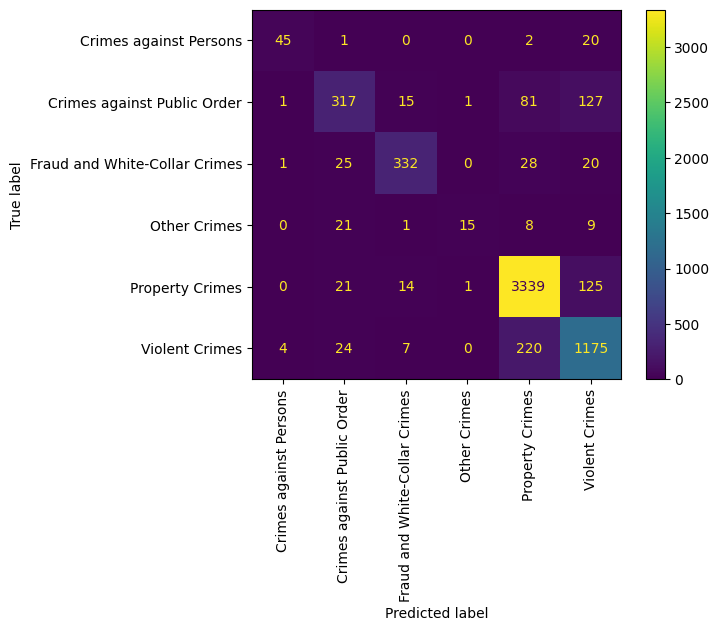

In [93]:
from sklearn.ensemble import GradientBoostingClassifier


gradientBoostingClassifier=Pipeline([('new_ct',new_ct),('GradientBoostingClassifier',GradientBoostingClassifier( random_state=0))])

gradientBoostingClassifier_model_score_test_half=[]
accuracy_scores_gradientBoostingClassifier_half = []
f1_scores_gradientBoostingClassifier_half = []



for train_index, test_index in data_split.split(xtrain_1, ytrain_1):
    X_train, X_test = new_train.iloc[train_index], new_train.iloc[test_index]
    y_train, y_test = new_train_y.iloc[train_index], new_train_y.iloc[test_index]
    
    gradientBoostingClassifier.fit(X_train, y_train)
    
    y_pred_gradientBoostingClassifier_half = gradientBoostingClassifier.predict(X_test)
    
    
    model_score_gradientBoostingClassifier=gradientBoostingClassifier.score(X_test,y_test)
    

    accuracy_gradientBoostingClassifier = accuracy_score(y_test, y_pred_gradientBoostingClassifier_half)
    
    
    f1_gradientBoostingClassifier = f1_score(y_test, y_pred_gradientBoostingClassifier_half, average='weighted')
    
    
    accuracy_scores_gradientBoostingClassifier_half.append(accuracy_gradientBoostingClassifier)
    
    f1_scores_gradientBoostingClassifier_half.append(f1_gradientBoostingClassifier)
    
    gradientBoostingClassifier_model_score_test_half.append(model_score_gradientBoostingClassifier)


print("Accuracy scores for each fold using gradientBoostingClassifier: ", accuracy_scores_gradientBoostingClassifier_half)
print("Average accuracy using gradientBoostingClassifier: ", np.mean(accuracy_scores_gradientBoostingClassifier_half))
print("F1 scores for each fold using gradientBoostingClassifier: ", f1_scores_gradientBoostingClassifier_half)
print("Average F1 score using gradientBoostingClassifier: ", np.mean(f1_scores_gradientBoostingClassifier_half))
print("model_score_test list  using gradientBoostingClassifier " ,gradientBoostingClassifier_model_score_test_half )


print('')
print('-----------------------------------------------------------------')
print('')

ytest_1_predicted_gradientBoostingClassifier=gradientBoostingClassifier.predict(xtest_1)
print('gradientBoostingClassifier classifier bestmodel score ',gradientBoostingClassifier.score(xtest_1,ytest_1))

print('gradientBoostingClassifier classifier bestmodel accuracy score ',accuracy_score( ytest_1 ,  ytest_1_predicted_gradientBoostingClassifier )   )

print('')
print('-----------------------------------------------------------------')
print('')



print(classification_report(ytest_1, gradientBoostingClassifier.predict(xtest_1)))

print('')
print('-----------------------------------------------------------------')
print('')



ConfusionMatrixDisplay.from_estimator(gradientBoostingClassifier, xtest_1, ytest_1,xticks_rotation='vertical')



In [94]:
from sklearn.ensemble import GradientBoostingClassifier


gradientBoostingClassifier_full=Pipeline([('new_ct',new_ct),('GradientBoostingClassifier',GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0))])

gradientBoostingClassifier_model_score_full=[]
accuracy_scores_gradientBoostingClassifier_full = []
f1_scores_gradientBoostingClassifier_full = []



for train_index, test_index in data_split.split(new_train, new_train_y):
    X_train, X_test = new_train.iloc[train_index], new_train.iloc[test_index]
    y_train, y_test = new_train_y.iloc[train_index], new_train_y.iloc[test_index]
    
    gradientBoostingClassifier_full.fit(X_train, y_train)
    
    y_pred_gradientBoostingClassifier_full = gradientBoostingClassifier_full.predict(X_test)
    
    
    model_score_gradientBoostingClassifier=gradientBoostingClassifier_full.score(X_test,y_test)
    

    accuracy_gradientBoostingClassifier = accuracy_score(y_test, y_pred_gradientBoostingClassifier_full)
    
    
    f1_gradientBoostingClassifier = f1_score(y_test, y_pred_gradientBoostingClassifier_full, average='weighted')
    
    
    accuracy_scores_gradientBoostingClassifier_full.append(accuracy_gradientBoostingClassifier)
    
    f1_scores_gradientBoostingClassifier_full.append(f1_gradientBoostingClassifier)
    
    gradientBoostingClassifier_model_score_full.append(model_score_gradientBoostingClassifier)


print("Accuracy scores for each fold using gradientBoostingClassifier: ", accuracy_scores_gradientBoostingClassifier_full)
print("Average accuracy using gradientBoostingClassifier: ", np.mean(accuracy_scores_gradientBoostingClassifier_full))
print("F1 scores for each fold using gradientBoostingClassifier: ", f1_scores_gradientBoostingClassifier_full)
print("Average F1 score using gradientBoostingClassifier: ", np.mean(f1_scores_gradientBoostingClassifier_full))
print("model_score_test list  using gradientBoostingClassifier " ,gradientBoostingClassifier_model_score_full )

Accuracy scores for each fold using gradientBoostingClassifier:  [0.8184044786564031, 0.8263913195659783, 0.8144907245362268, 0.8211410570528527, 0.8165908295414771, 0.8092404620231012, 0.8120406020301015]
Average accuracy using gradientBoostingClassifier:  0.8168999247723059
F1 scores for each fold using gradientBoostingClassifier:  [0.8046675631728113, 0.8139172361329855, 0.801573692229265, 0.809498354460821, 0.803030012855052, 0.7963158232285634, 0.7983299709090038]
Average F1 score using gradientBoostingClassifier:  0.8039046647126431
model_score_test list  using gradientBoostingClassifier  [0.8184044786564031, 0.8263913195659783, 0.8144907245362268, 0.8211410570528527, 0.8165908295414771, 0.8092404620231012, 0.8120406020301015]


# RandomForest

In [95]:
from sklearn.ensemble import RandomForestClassifier

randomForestClassifier=Pipeline([('new_ct',new_ct),('randomForest',RandomForestClassifier(random_state=1))])
randomForestClassifier.fit(xtrain_1, ytrain_1)



ypred_randomForest=randomForestClassifier.predict(xtest_1)

print("randomForestClassifier score",randomForestClassifier.score(xtest_1,ytest_1))

print('randomForestClassifier accuracy score' , accuracy_score(ytest_1,ypred_randomForest))

randomForestClassifier score 0.8591666666666666
randomForestClassifier accuracy score 0.8591666666666666


# Random Forest HPT

In [96]:

# param_grid_rf = {'randomForest__n_estimators':[200,300 ,400 ],  
#                           'randomForest__max_depth': [None, 10, 20, 30], 
#                           'randomForest__min_samples_split':[2, 5, 10],  
#                           'randomForest__min_samples_leaf': [1,2,3, 4], 
#                           'randomForest__class_weight': ['balanced',None] 
#                          }



# gs_rf = RandomizedSearchCV(randomForestClassifier, param_grid_rf, cv=data_split, scoring='accuracy',n_jobs=-1)

# gs_rf.fit(xtrain_1, ytrain_1)

# print('Test score of randomForestClassifier ',gs_rf.score(xtest_1,ytest_1))


# print('')
# print('-----------------------------------------------------------------')
# print('')


# print('Best Parameter are' ,gs_rf.best_params_ )





# Test score of randomForestClassifier  0.8585

# -----------------------------------------------------------------

# Best Parameter are {'randomForest__n_estimators': 200, 'randomForest__min_samples_split': 2, 'randomForest__min_samples_leaf': 1, 'randomForest__max_depth': 30, 'randomForest__class_weight': None}

Accuracy scores for each fold using rf_best:  [0.8765, 0.862, 0.857, 0.8645, 0.861, 0.871, 0.864]
Average accuracy using rf_best:  0.8651428571428571
F1 scores for each fold using rf_best:  [0.86970894651695, 0.853638798609922, 0.8490277558731462, 0.8554319003323637, 0.8521739733572347, 0.8634012050429495, 0.8560718607010762]
Average F1 score using rf_best:  0.8570649200619488
model_score_test list  using rf_best  [0.8765, 0.862, 0.857, 0.8645, 0.861, 0.871, 0.864]
Average model_score_test F1 score using rf_best:  0.8651428571428571

-----------------------------------------------------------------

randomForest classifier bestmodel score  0.9458333333333333
randomForest classifier bestmodel accuracy score  0.9458333333333333

-----------------------------------------------------------------

                               precision    recall  f1-score   support

       Crimes against Persons       0.98      0.72      0.83        68
  Crimes against Public Order       0.92      0.85   

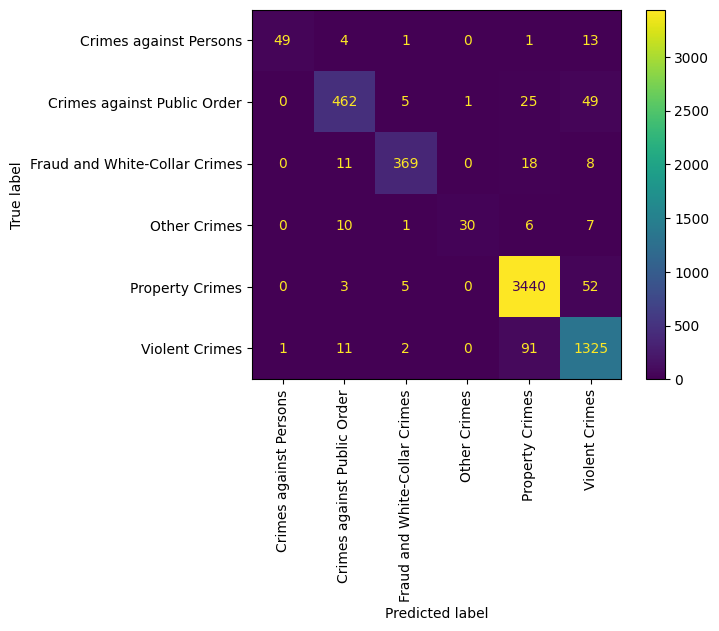

In [97]:
rf_best=Pipeline([('new_ct',new_ct),
                  ('randomForest',RandomForestClassifier(random_state=1,n_estimators=200,min_samples_split=2,min_samples_leaf=1,max_depth=30,class_weight=None))])


rf_best_model_score_test=[]
accuracy_scores_rf_best = []
f1_scores_rf_best_half = []



for train_index, test_index in data_split.split(xtrain_1, ytrain_1):
    X_train, X_test = new_train.iloc[train_index], new_train.iloc[test_index]
    y_train, y_test = new_train_y.iloc[train_index], new_train_y.iloc[test_index]
    
    rf_best.fit(X_train, y_train)
    
    y_pred_rf_best = rf_best.predict(X_test)
    
    
    model_score_rf_best=rf_best.score(X_test,y_test)
    

    accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
    
    
    f1_rf_best = f1_score(y_test, y_pred_rf_best, average='weighted')
    
    
    accuracy_scores_rf_best.append(accuracy_rf_best)
    
    f1_scores_rf_best_half.append(f1_rf_best)
    
    rf_best_model_score_test.append(model_score_rf_best)


print("Accuracy scores for each fold using rf_best: ", accuracy_scores_rf_best)
print("Average accuracy using rf_best: ", np.mean(accuracy_scores_rf_best))
print("F1 scores for each fold using rf_best: ", f1_scores_rf_best_half)
print("Average F1 score using rf_best: ", np.mean(f1_scores_rf_best_half))
print("model_score_test list  using rf_best " ,rf_best_model_score_test )
print("Average model_score_test F1 score using rf_best: ", np.mean(rf_best_model_score_test))



print('')
print('-----------------------------------------------------------------')
print('')

ytest_1_predicted_rf_bestl=rf_best.predict(xtest_1)
print('randomForest classifier bestmodel score ',rf_best.score(xtest_1,ytest_1))

print('randomForest classifier bestmodel accuracy score ',accuracy_score( ytest_1 ,  ytest_1_predicted_rf_bestl )   )

print('')
print('-----------------------------------------------------------------')
print('')



print(classification_report(ytest_1, rf_best.predict(xtest_1)))

print('')
print('-----------------------------------------------------------------')
print('')



ConfusionMatrixDisplay.from_estimator(rf_best, xtest_1, ytest_1,xticks_rotation='vertical')




In [98]:
rf_best_final=Pipeline([('new_ct',new_ct),
                  ('randomForest',RandomForestClassifier(n_estimators=200,min_samples_split=2,min_samples_leaf=1,max_depth=30,class_weight=None,random_state=1))])


rf_best_final_score=[]
accuracy_scores_rf_best_final = []
f1_scores_rf_best_final= []



for train_index, test_index in data_split.split(new_train, new_train_y):
    X_train, X_test = new_train.iloc[train_index], new_train.iloc[test_index]
    y_train, y_test = new_train_y.iloc[train_index], new_train_y.iloc[test_index]
    
    rf_best_final.fit(X_train, y_train)
    
    y_pred_rf_best_final = rf_best_final.predict(X_test)
    
    
    model_score_rf_best_final=rf_best_final.score(X_test,y_test)
    

    accuracy_rf_best_final = accuracy_score(y_test, y_pred_rf_best_final)
    
    
    f1_rf_best_final = f1_score(y_test, y_pred_rf_best_final, average='weighted')
    
    
    accuracy_scores_rf_best_final.append(accuracy_rf_best_final)
    
    f1_scores_rf_best_final.append(f1_rf_best_final)
    
    rf_best_final_score.append(model_score_rf_best_final)


print("Accuracy scores for each fold using rf_best_final: ", accuracy_scores_rf_best_final)
print("Average accuracy using rf_best_final: ", np.mean(accuracy_scores_rf_best_final))
print("F1 scores for each fold using rf_best_final: ", f1_scores_rf_best_final)
print("Average F1 score using rf_best_final: ", np.mean(f1_scores_rf_best_final))
print("model_score_test list  using rf_best_final " ,rf_best_final_score )
print("Average model_score_test F1 score using rf_best_final: ", np.mean(rf_best_final_score))


Accuracy scores for each fold using rf_best_final:  [0.8656403079076277, 0.8659432971648583, 0.8683934196709836, 0.8676933846692335, 0.871893594679734, 0.8624431221561079, 0.8757437871893594]
Average accuracy using rf_best_final:  0.8682501304911293
F1 scores for each fold using rf_best_final:  [0.857343423143131, 0.8581820289349434, 0.8614151183094089, 0.8612304436968367, 0.863964820622477, 0.8533117690602946, 0.868586169461538]
Average F1 score using rf_best_final:  0.8605762533183755
model_score_test list  using rf_best_final  [0.8656403079076277, 0.8659432971648583, 0.8683934196709836, 0.8676933846692335, 0.871893594679734, 0.8624431221561079, 0.8757437871893594]
Average model_score_test F1 score using rf_best_final:  0.8682501304911293


In [99]:
print('randomForest classifier bestmodel accuracy score ',accuracy_score( ytest_1 ,  ytest_1_predicted_rf_bestl )   )

print('gradientBoostingClassifier classifier bestmodel accuracy score ',accuracy_score( ytest_1 ,  ytest_1_predicted_gradientBoostingClassifier )   )

print('histGradientBoostingClassifier  bestmodel accuracy score ',accuracy_score( ytest_1 ,  ytest_1_predicted_HGB_CLF_best )   )

print('svc_best_model classifier bestmodel accuracy score ',accuracy_score( ytest_1 ,  ytest_1_predicted_svc_bestmodel )   )


randomForest classifier bestmodel accuracy score  0.9458333333333333
gradientBoostingClassifier classifier bestmodel accuracy score  0.8705
histGradientBoostingClassifier  bestmodel accuracy score  0.863
svc_best_model classifier bestmodel accuracy score  0.8506666666666667


# TEST FINAL

# Loading the test_final data

In [100]:
test_final=pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/test.csv')

# Converting time into day category

In [101]:
test_final['day_category']=test_final.loc[:,'Time_Occurred'].apply(day_category )

# Extracting the date features

In [102]:


# Extracting the dates
test_final.loc[:,'Date_Reported']=test_final.loc[:,'Date_Reported'].apply(extract_date)
test_final.loc[:,'Date_Occurred']=test_final.loc[:,'Date_Occurred'].apply(extract_date)




# converitng into date

test_final['Date_Reported']=pd.to_datetime(test_final['Date_Reported']).dt.date
test_final['Date_Occurred']=pd.to_datetime(test_final['Date_Occurred']).dt.date


#             extracting the reporting delay days count

test_final['reporting_delay_day_count']=(test_final['Date_Reported']-test_final['Date_Occurred'])




# countign the days

def day_count(d):
    return d.days
test_final.loc[:,'reporting_delay_day_count']=test_final.loc[:,'reporting_delay_day_count'].apply(day_count)




test_final.loc[:,'reporting_delay_day_count']=test_final.loc[:,'reporting_delay_day_count'].apply(lambda x : int(x))



# Handling the gender column

In [103]:

print("Unique values of victim sex are",test_final['Victim_Sex'].unique())

print('---------------------------------------------------------------')


print('')
print('')

print('Value counts are')
print(test_final['Victim_Sex'].value_counts())

print('')
print('')
print('---------------------------------------------------------------')



print("Number of null values are" , test_final['Victim_Sex'].isnull().sum())





distribution_gender_test = test_final['Victim_Sex'].dropna().value_counts(normalize=True)

missing_gender_test = test_final['Victim_Sex'].isna().sum()

imputed_values_gender_test = np.random.choice(distribution_gender_test.index, size=missing_gender_test, p=distribution_gender_test.values)


test_final.loc[test_final['Victim_Sex'].isna(), 'Victim_Sex'] = imputed_values_gender_test



print('')
print('')

print('---------------------------------------------------------------')

print("Number of null values after imputing are" , test_final['Victim_Sex'].isnull().sum())

test_final.loc[:,'Victim_Sex']=test_final.loc[:,'Victim_Sex'].replace('H','X')


print('---------------------------------------------------------------')
print('')
print('')



Unique values of victim sex are ['F' 'M' nan 'X' 'H']
---------------------------------------------------------------


Value counts are
Victim_Sex
M    2121
F    1840
X     395
H       1
Name: count, dtype: int64


---------------------------------------------------------------
Number of null values are 643


---------------------------------------------------------------
Number of null values after imputing are 0
---------------------------------------------------------------




 # Weapon_Description

In [104]:
test_final.loc[train['Weapon_Description'] == 'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)', 'Weapon_Description'] = 'Physical Force'


test_final.loc[:,'Weapon_Description']=test_final['Weapon_Description'].apply(lambda x: gun(x))

# unique_values_weapon_test=pd.DataFrame(test_final['Weapon_Description'])
# unique_values_weapon_test.value_counts(normalize=True)

# distribution_test = test_final['Weapon_Description'].dropna().value_counts(normalize=True)

# missing_test = test_final['Weapon_Description'].isnull().sum()

# imputed_values_test = np.random.choice(distribution_test.index, size=missing_test, p=distribution_test.values)

# # Impute the missing values
# test_final.loc[test_final['Weapon_Description'].isnull(), 'Weapon_Description'] = imputed_values_test



In [105]:
test_final

print('Number of unqiue values are')
test_final['Weapon_Description'].value_counts()

Number of unqiue values are


Weapon_Description
NA                    3153
Physical Force        1007
sharp_heavy_object     431
other_weapon           170
Gun                    167
fire                    44
VEHICLE                 28
Name: count, dtype: int64

In [106]:
distribution_test = test_final['Weapon_Description'][test_final['Weapon_Description'] != 'NA'].value_counts(normalize=True)

missing_test = test_final[test_final['Weapon_Description']=='NA']['Weapon_Description'].count()

imputed_values_test = np.random.choice(distribution_test.index, size=missing_test, p=distribution_test.values)


test_final.loc[test_final['Weapon_Description']=='NA', 'Weapon_Description'] = imputed_values_test

In [107]:
test_final.isnull().sum()

Location                        0
Cross_Street                 4190
Latitude                        0
Longitude                       0
Date_Reported                   0
Date_Occurred                   0
Time_Occurred                   0
Area_ID                         0
Area_Name                       0
Reporting_District_no           0
Part 1-2                        0
Modus_Operandi                684
Victim_Age                      0
Victim_Sex                      0
Victim_Descent                643
Premise_Code                    0
Premise_Description             1
Weapon_Used_Code             3153
Weapon_Description              0
Status                          0
Status_Description              0
day_category                    0
reporting_delay_day_count       0
dtype: int64

In [108]:
distribution_Descent_test = test_final['Victim_Descent'].dropna().value_counts(normalize=True)

missing_Descent_test = test_final['Victim_Descent'].isna().sum()

imputed_values_Descent_test = np.random.choice(distribution_Descent_test.index, size=missing_Descent_test, p=distribution_Descent_test.values)


test_final.loc[test_final['Victim_Descent'].isna(), 'Victim_Descent'] = imputed_values_Descent_test





# distribution_test = test_final['Victim_Descent'].dropna().value_counts(normalize=True)

# missing_test = test_final['Victim_Descent'].isnull().sum()

# imputed_values_test = np.random.choice(distribution_test.index, size=missing_test, p=distribution_test.values)

# # Impute the missing values
# test_final.loc[test_final['Victim_Descent'].isnull(), 'Victim_Descent'] = imputed_values_test

# Modus_Operandi

In [109]:
test_final.loc[:,'Modus_Operandi'] = test_final.loc[:,'Modus_Operandi'].fillna('')


def number_of_activities(s):
    if s=='':  # Handle NaN values
        return 0
    activities_list=s.split()
    activity_count = list(set(activities_list))
    return len(activity_count)


test_final['activity_count']=test_final['Modus_Operandi'].apply(number_of_activities)



# def number_of_activities(s):
#     if s=='':  # Handle NaN values
#         return 0
#     activities_list=s.split()
#     activity_count = list(set(activities_list))
#     activities = set()  # Using a set to avoid duplicates efficiently
#     for activity in s.split(' '):
#         activities.add(str(activity))
#     activities=' '.join(activities)    
#     return len(activity_count)
# train['activity_count']=train['Modus_Operandi'].apply(number_of_activities)


In [110]:
# test_final['Modus_Operandi']=test_final['Modus_Operandi'].apply(number_of_activities)
test_final['Part 1-2']=test_final['Part 1-2'].apply(lambda x : str(x))


# Victim age

In [111]:
print(test_final['Victim_Age'].unique())

test_final.loc[test_final['Victim_Age']<0,'Victim_Age']=0

print('---------------------------------------------------------------')


print(test_final['Victim_Age'].unique())

print('---------------------------------------------------------------')


test_final.loc[:,'Victim_Age']=test_final.loc[:,'Victim_Age'].apply(lambda x : int(x))


test_final.loc[test_final['Victim_Age']==0,'Victim_Age']=test_final['Victim_Age'].mean()


[28. 26. 62.  0. 37. 58. 21. 19. 31. 35. 25. 27. 20. 67. 36. 15. 24. 53.
 30. 38. 71. 34. 16. 33. 32. 77. 39. 52. 23. 61. 50. 63. 45. 22. 73. 40.
 60. 55. 29. 41. 51. 46. -2. 44. 99. 81. 43. 57. 12. 79. 93. 65. 54. 59.
 83. 64. 49. 56. 47. 42. 70. 78. 68. 80. 18. 96. 48. 74. 76. 11. 14. 66.
 72.  7. 10.  6. 69. 17. 82.  5.  9.  4. 85. 75. 88.  8. 86. 13.  3.  2.
 -1. 84. 90. 91.]
---------------------------------------------------------------
[28. 26. 62.  0. 37. 58. 21. 19. 31. 35. 25. 27. 20. 67. 36. 15. 24. 53.
 30. 38. 71. 34. 16. 33. 32. 77. 39. 52. 23. 61. 50. 63. 45. 22. 73. 40.
 60. 55. 29. 41. 51. 46. 44. 99. 81. 43. 57. 12. 79. 93. 65. 54. 59. 83.
 64. 49. 56. 47. 42. 70. 78. 68. 80. 18. 96. 48. 74. 76. 11. 14. 66. 72.
  7. 10.  6. 69. 17. 82.  5.  9.  4. 85. 75. 88.  8. 86. 13.  3.  2. 84.
 90. 91.]
---------------------------------------------------------------


In [112]:
test_final.loc[:,'Premise_Code']=test_final['Premise_Code'].apply(lambda x : top_10_Premise_Code_function(x))

/tmp/ipykernel_18/2320598785.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['000' '000' '000' ... '000' '000' '000']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  test_final.loc[:,'Premise_Code']=test_final['Premise_Code'].apply(lambda x : top_10_Premise_Code_function(x))


In [113]:
test_final.loc[:,'Area_ID']=test_final.loc[:,'Area_ID'].apply(lambda x : str(x))
test_final=test_final[['Latitude','Longitude','Victim_Age','activity_count','reporting_delay_day_count','Area_ID','Part 1-2','Victim_Sex','Victim_Descent','Weapon_Description','Status','day_category','Modus_Operandi']]


/tmp/ipykernel_18/4105633067.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['3.0' '20.0' '18.0' ... '19.0' '1.0' '18.0']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  test_final.loc[:,'Area_ID']=test_final.loc[:,'Area_ID'].apply(lambda x : str(x))


In [114]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Latitude                   5000 non-null   float64
 1   Longitude                  5000 non-null   float64
 2   Victim_Age                 5000 non-null   float64
 3   activity_count             5000 non-null   int64  
 4   reporting_delay_day_count  5000 non-null   object 
 5   Area_ID                    5000 non-null   object 
 6   Part 1-2                   5000 non-null   object 
 7   Victim_Sex                 5000 non-null   object 
 8   Victim_Descent             5000 non-null   object 
 9   Weapon_Description         5000 non-null   object 
 10  Status                     5000 non-null   object 
 11  day_category               5000 non-null   object 
 12  Modus_Operandi             5000 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage:

In [115]:
test_final

,Latitude,Longitude,Victim_Age,activity_count,reporting_delay_day_count,Area_ID,Part 1-2,Victim_Sex,Victim_Descent,Weapon_Description,Status,day_category,Modus_Operandi
0,34.0128,-118.3045,28.000,6,0,3.0,2.0,F,H,Physical Force,IC,Evening,0416 1241 1243 1813 1821 2000
1,34.0726,-118.3029,26.000,2,37,20.0,1.0,M,B,sharp_heavy_object,IC,Night,0344 0394
2,33.9348,-118.2695,62.000,6,1,18.0,2.0,F,B,Physical Force,IC,Morning,1822 0701 1914 0355 1202 0100
3,34.0497,-118.3442,30.593,0,20,7.0,1.0,M,H,Physical Force,IC,Night,
4,34.1611,-118.3704,37.000,1,1,15.0,2.0,F,W,Physical Force,AO,Night,1501
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,34.0409,-118.3408,30.593,0,1,7.0,1.0,F,O,other_weapon,IC,Night,
4996,34.0347,-118.2253,30.593,2,7,4.0,1.0,X,X,sharp_heavy_object,IC,Daytime,1300 0325
4997,34.2392,-118.4698,38.000,3,0,19.0,2.0,M,H,Physical Force,AA,Night,0913 1817 0416
4998,34.0453,-118.2443,41.000,1,1,1.0,2.0,M,B,sharp_heavy_object,AO,Night,0416


In [116]:
test_final.shape

(5000, 13)

In [117]:
sample=pd.read_csv('/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv')
sample

,ID,Crime_Category,Unnamed: 2
0,1,Crimes against Persons,NaN
1,2,Crimes against Public Order,NaN
2,3,Other Crimes,NaN
3,4,Crimes against Public Order,NaN
4,5,Other Crimes,NaN
...,...,...,...
995,996,Fraud and White-Collar Crimes,NaN
996,997,Property Crimes,NaN
997,998,Violent Crimes,NaN
998,999,Property Crimes,NaN


In [118]:
test_final.isnull().sum()

Latitude                     0
Longitude                    0
Victim_Age                   0
activity_count               0
reporting_delay_day_count    0
Area_ID                      0
Part 1-2                     0
Victim_Sex                   0
Victim_Descent               0
Weapon_Description           0
Status                       0
day_category                 0
Modus_Operandi               0
dtype: int64

In [119]:
print("Train features:", xtrain_1.columns)
print("Test features:", test_final.columns)

Train features: Index(['Latitude', 'Longitude', 'Victim_Age', 'activity_count',
       'reporting_delay_day_count', 'Area_ID', 'Part 1-2', 'Victim_Sex',
       'Victim_Descent', 'Weapon_Description', 'Status', 'day_category',
       'Modus_Operandi'],
      dtype='object')
Test features: Index(['Latitude', 'Longitude', 'Victim_Age', 'activity_count',
       'reporting_delay_day_count', 'Area_ID', 'Part 1-2', 'Victim_Sex',
       'Victim_Descent', 'Weapon_Description', 'Status', 'day_category',
       'Modus_Operandi'],
      dtype='object')


In [120]:
y_pred_submission=rf_best_final.predict(test_final)
submission=pd.DataFrame({'ID': np.arange(1,5000+1), 'Crime_Category': y_pred_submission})

submission.to_csv('submission.csv',index=False)